# PART 1 Exploratory data analysis 
Cette partie nous permet d'extraire les variables importantes, identifier les valeurs aberrantes et manquantes et ainsi nettoyer l'ensemble de nos données.
Maximiser nos informations sur les données et mieux comprendre la relation entre les variables.

In [166]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import spacy
from urllib.parse import urlparse
import re
import regex
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
# !python -m spacy download fr_core_news_sm
from nltk.stem.snowball import SnowballStemmer
from unidecode import unidecode
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from sklearn.compose import ColumnTransformer

In [2]:
data = Path("../data/").glob("*.parquet") 
data = list(data)

[print(parquet.name) for parquet in data]

part-00000-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00001-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00002-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00003-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00004-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet


[None, None, None, None, None]

In [3]:
df = pd.concat((pd.read_parquet(parquet, engine='fastparquet') for parquet in data))

In [4]:
pd.set_option("max_colwidth", None)
df.head(15)

url  \
0                   https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                              https://www.mystalk.net/profile/vitoriafcorrea   
2                                                                        https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html   
3                                            http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                            https://context.reverso.net/traduction/espagnol-francais/Para+ir   
5                https://www.nordeclair.fr/700287/article/2020-01-25/roubaix-les-panneaux-solaires-installes-sur-la-mediatheque-n-etaient-pas   
6                                                                             https://www.750g.com/gateau-breton-de-mamie-scarlett-r70200.htm   
7                                                                      http://www.jeuxvideo.com/forums/1-18505-21783-1-0-1-0-duree-de-vie.htm   
8                                                  https://www.lachainemeteo.com/meteo-france/ville-774900/previsions-meteo-tourtour-vendredi   
9                                                                                            https://fr.shopping.rakuten.com/s/lauren+st+john   
10                                                            http://m.jeuxvideo.com/forums/42-28979-59900574-1-0-1-0-la-configuration-pc.htm   
11  http://mamiehiou.over-blog.com/article-ne-expletif-quand-peut-on-l-employer-sans-que-je-ne-avant-que-je-ne-je-crains-que-tu-94163090.html   
12                                                            https://dictionnaire.reverso.net/francais-synonymes/d%C3%A9faut+de+qualit%C3%A9   
13                                                                                                https://www.mystalk.net/search/michaelaachr   
14                                                      https://www.cuisineaz.com/diaporamas/recettes-de-galettes-des-rois-982/interne/1.aspx   

                           target  day  
0   [1831, 1751, 1192, 745, 1703]    4  
1      [847, 978, 582, 1381, 529]    4  
2                 [20, 1077, 294]    4  
3      [381, 935, 1343, 622, 933]    4  
4    [692, 1265, 725, 1264, 1266]    4  
5     [686, 501, 572, 1422, 5690]    4  
6   [1513, 907, 1573, 1526, 1556]    4  
7     [381, 925, 1343, 622, 1311]    4  
8          [63, 5692, 1254, 1119]    4  
9         [61, 353, 210, 531, 41]    4  
10      [925, 1343, 41, 211, 930]    4  
11     [509, 1265, 108, 474, 374]    4  
12     [692, 1265, 108, 474, 374]    4  
13     [847, 978, 582, 1381, 529]    4  
14   [678, 1513, 907, 1573, 1526]    4

In [5]:
df = df.reset_index(drop=True)
df 

url  \
0                               https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                          https://www.mystalk.net/profile/vitoriafcorrea   
2                                                                                    https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html   
3                                                        http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                        https://context.reverso.net/traduction/espagnol-francais/Para+ir   
...                                                                                                                                                   ...   
67590                                                                                         https://www.jeu-concours.biz/gagner-cafetiere-expresso.html   
67591                                                                                                             https://www.sto.cx/book-186042-471.html   
67592                                                                                     http://jeu.info/solution/4-images-1-mot-niveau-2023-a-2060.html   
67593                                                                     https://grossesse.aufeminin.com/forum/levres-gonflees-et-accouchement-fd4242229   
67594  https://www.conforama.fr/chambre-literie/literie/sommier-et-cadre-a-lattes/sommier-avec-coffre-160x200-cm-bultex-asteroid-coloris-bouleau/p/663906   

                               target  day  
0       [1831, 1751, 1192, 745, 1703]    4  
1          [847, 978, 582, 1381, 529]    4  
2                     [20, 1077, 294]    4  
3          [381, 935, 1343, 622, 933]    4  
4        [692, 1265, 725, 1264, 1266]    4  
...                               ...  ...  
67590                [1276, 65, 1113]    1  
67591     [608, 617, 1033, 220, 1021]    1  
67592      [381, 925, 622, 1494, 937]   16  
67593       [638, 253, 419, 558, 401]    1  
67594  [1367, 1372, 1368, 1370, 1369]   16  

[67595 rows x 3 columns]

#### Taille des URLs

Text(0.5, 0, 'taille des URLS')

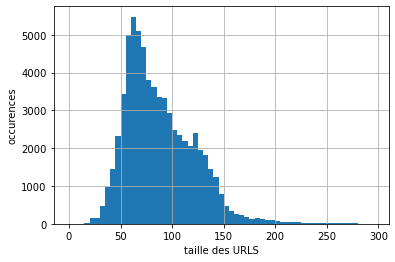

In [6]:
lens = df.url.str.len()
lens.hist(bins = np.arange(0,300,5))
plt.ylabel('occurences')
plt.xlabel('taille des URLS')


## Preprocessing des URLs

### Pré-traitement : 
Cette étape permet de standardiser le texte afin de rendre son usage plus facile.
- Normalisation: minisucule, majuscule 

- Tockenization : C’est probablement l’étape la plus importante et la plus complexe du processus et représente un point majeur dans l'obtention des résultats. La tokenisation cherche à transformer un texte en une série de tokens individuels. En général nous avons :
- tockenizers basées sur les règles, comme spacy par exemple. Cependant ce type ne gére pas efficacement les mots rares. 
- tokenisation en sous-mots : comme byte-pair encoding (BPE), wordpiece, unigram language model, sentencepiece.
    Ce deuxième type peut gerer les mots rares et inconnes. Néaumoins, les tokenizers de sous-mots sont appris à partir de données, la qualité et la quantité des données sont cruciales pour obtenir de bonnes performances.
La construction de vocabulaire peut soit se faire traditionnellement ou avec hachage .
Lorsque nous n'avons pas beaucoup de données, il peut être préférable d’utiliser un tokenizer basé sur des règles.
Nous pouvons dans ce cas là, utiliser un tockenizers qui sont déja construits sans avoir à en construire un.

A noter: Moins de normalisation et de ségmentation tend à conduire à un vocabulaire plus important. Par conséquant, une taille de vocabulaire plus importante peut ralentir l’entraînement et peut aussi causer des problèmes de mémoire.

### Numérisation (Représentation du texte en format numérique) :
Cette étape peut être effectuée via des techniques de sac de mots (`Bag of Words`) ou `Term Frequency-Inverse Document Frequency (Tf-IdF)`. On peut également apprendre des représentations vectorielles (`embedding`) par apprentissage profond.
BOW: Le nombre de mots n'est pas toujours la meilleure idée car il y a des mots dans les URL qui sont plus importants que les autres mots. 

Egalement d'autres désavantages pour BOW: 
- Ignore l'ordre des mots dans notre phrase 
- N'a pas une compréhension sémantique 
- Taille du vecteur trop importante et contient beaucoup de valeurs nulles.

Nous pourrons utiliser les trois techniques (`BOW`, `TF-IDF`, et les `embeddings`) pour nos modèles afin de voir si BOW suffit.

### Feature Engineering
Nous créerons également des colonnes supplémentaires à partir de la colonne `url`.

#### Le stemming et la lemmatization
Ce sont des formes plus poussées de normalisation, comme extraire la racine du mot(stemming) ou enlever prèfixes des mots (lemmatization) ou unifier les mots qui se ressemblent. Dans notre cas ou nous avons des URLs.



#### Nous allons combiner plusieurs de ces techniques présentées puis résumerons les résultats dans un tableau tout à la fin

In [7]:
df.head(5)

url  \
0  https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                             https://www.mystalk.net/profile/vitoriafcorrea   
2                                                       https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html   
3                           http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                           https://context.reverso.net/traduction/espagnol-francais/Para+ir   

                          target  day  
0  [1831, 1751, 1192, 745, 1703]    4  
1     [847, 978, 582, 1381, 529]    4  
2                [20, 1077, 294]    4  
3     [381, 935, 1343, 622, 933]    4  
4   [692, 1265, 725, 1264, 1266]    4

1. Nous testerons differentes approches afin de tockeniser les URLS car ils ne ressemblent pas à un texte de document.
2. A Première vue, les mots des liens sont séparés par des: `tirets, Majuscules, +, ",", !, : , _ , %, et peut etre d'autres caractères spéciaux: # ; @ ? & $ ~ crochets et accolades` .
Il semble aussi y avoir des mots collés comme par exemple : "TennisFicheJoueur1500000000003017.html"
3. Nous pouvons également au début essayer de séparer les sites, ainsi que les mots des chemins des URLs. Nous pouvons séparer les mots collés qui commencent par des majuscules.


L'URL est en général composé d'un : `domaine`, `sous-domaine`, `protocole`, `chemin du fichier` et la `requete`. 
Dans un premier nous pourrons créer des catégories à partir de l'url et voir ce que ça donne.

In [8]:
def url_parse(url):
    parse_result = urlparse(url)
    result = [parse_result.scheme, parse_result.netloc, parse_result.path, parse_result.params, parse_result.query, parse_result.fragment]
    return result

In [9]:
df_parsed = pd.concat([df, 
                       pd.DataFrame(list(map(url_parse, df.url)),
                    columns= ['scheme','netloc','path','params','quer','fragment'],
                   index=df.url.index) 
                       ], axis=1)
df_parsed

url  \
0                               https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                          https://www.mystalk.net/profile/vitoriafcorrea   
2                                                                                    https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html   
3                                                        http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                        https://context.reverso.net/traduction/espagnol-francais/Para+ir   
...                                                                                                                                                   ...   
67590                                                                                         https://www.jeu-concours.biz/gagner-cafetiere-expresso.html   
67591                                                                                                             https://www.sto.cx/book-186042-471.html   
67592                                                                                     http://jeu.info/solution/4-images-1-mot-niveau-2023-a-2060.html   
67593                                                                     https://grossesse.aufeminin.com/forum/levres-gonflees-et-accouchement-fd4242229   
67594  https://www.conforama.fr/chambre-literie/literie/sommier-et-cadre-a-lattes/sommier-avec-coffre-160x200-cm-bultex-asteroid-coloris-bouleau/p/663906   

                               target  day scheme                   netloc  \
0       [1831, 1751, 1192, 745, 1703]    4  https        www.cdiscount.com   
1          [847, 978, 582, 1381, 529]    4  https          www.mystalk.net   
2                     [20, 1077, 294]    4  https           www.lequipe.fr   
3          [381, 935, 1343, 622, 933]    4   http          m.jeuxvideo.com   
4        [692, 1265, 725, 1264, 1266]    4  https      context.reverso.net   
...                               ...  ...    ...                      ...   
67590                [1276, 65, 1113]    1  https     www.jeu-concours.biz   
67591     [608, 617, 1033, 220, 1021]    1  https               www.sto.cx   
67592      [381, 925, 622, 1494, 937]   16   http                 jeu.info   
67593       [638, 253, 419, 558, 401]    1  https  grossesse.aufeminin.com   
67594  [1367, 1372, 1368, 1370, 1369]   16  https         www.conforama.fr   

                                                                                                                             path  \
0                                /bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                         /profile/vitoriafcorrea   
2                                                                                  /Tennis/TennisFicheJoueur1500000000003017.html   
3                                                      /forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                           /traduction/espagnol-francais/Para+ir   
...                                                                                                                           ...   
67590                                                                                             /gagner-cafetiere-expresso.html   
67591                                                                                                       /book-186042-471.html   
67592                                                                            /solution/4-images-1-mot-niveau-2023-a-2060.html  

#### Enlever les colonnes vides

In [10]:
# parametres: 
(df_parsed.params.values != '').sum()   

436

In [11]:
# fragments: 
(df_parsed.fragment.values != '').sum()

0

In [12]:
# queries: 
(df_parsed.quer.values != '').sum()

0

In [13]:
df_params = df_parsed[df_parsed.params.values != '']
print(df_params.shape)
df_params

(436, 9)


url  \
66     https://webmail1k.orange.fr/webmail/fr_FR/continue.html;jsessionid=EE87C6577FA68F2D500E15BC0816BA12.1CF0203943E1663B1DB4   
122    https://webmail1k.orange.fr/webmail/fr_FR/continue.html;jsessionid=0A0B2C11298F84C2E2932ABDBCBC5439.F37C668BAC6D2089F132   
130    https://webmail1f.orange.fr/webmail/fr_FR/continue.html;jsessionid=C9B568DE5605587F79E44FFE73B9CED9.4EC2A91011D3EF1F4C85   
349    https://webmail1h.orange.fr/webmail/fr_FR/continue.html;jsessionid=FC608ACCF5FB438601074193F6FC4E83.B717BB68E806FD69B754   
367    https://webmail1g.orange.fr/webmail/fr_FR/continue.html;jsessionid=AF49F77C582B78557A586685316F5F22.643E0B133B2F4D1D6779   
...                                                                                                                         ...   
66826  https://webmail1h.orange.fr/webmail/fr_FR/continue.html;jsessionid=5F350F4E72F687C00E8C69D9C3B24E5E.F2423967AE537F66F107   
67096  https://webmail22.orange.fr/webmail/fr_FR/continue.html;jsessionid=18AE7A884A0BAAFF16CCCBA43328161F.CED9FF7F91C8BA24CD9A   
67126  https://webmail1j.orange.fr/webmail/fr_FR/continue.html;jsessionid=9DE63B7E1227EA7B5FABE3A5F62FDEEE.4A91093615804F354AD3   
67195  https://webmail1p.orange.fr/webmail/fr_FR/continue.html;jsessionid=91DE2D3C474CE65B3CD78C1ABEE0ECB8.68A94B5535B80D4C6AEA   
67477  https://webmail1g.orange.fr/webmail/fr_FR/continue.html;jsessionid=F65ADD50C544395871C0C18DAF74CFCF.692D2718363C61166A6D   

                           target  day scheme               netloc  \
66     [104, 394, 1379, 304, 384]    4  https  webmail1k.orange.fr   
122    [104, 394, 1379, 304, 384]    4  https  webmail1k.orange.fr   
130    [104, 394, 1379, 304, 384]    4  https  webmail1f.orange.fr   
349     [104, 390, 394, 384, 301]    7  https  webmail1h.orange.fr   
367    [302, 1142, 394, 807, 301]    7  https  webmail1g.orange.fr   
...                           ...  ...    ...                  ...   
66826  [104, 394, 1379, 304, 384]   13  https  webmail1h.orange.fr   
67096  [104, 394, 1379, 304, 384]   17  https  webmail22.orange.fr   
67126  [302, 1142, 394, 807, 301]    2  https  webmail1j.orange.fr   
67195   [104, 390, 382, 386, 384]    2  https  webmail1p.orange.fr   
67477  [302, 1142, 394, 807, 301]   16  https  webmail1g.orange.fr   

                               path  \
66     /webmail/fr_FR/continue.html   
122    /webmail/fr_FR/continue.html   
130    /webmail/fr_FR/continue.html   
349    /webmail/fr_FR/continue.html   
367    /webmail/fr_FR/continue.html   
...                             ...   
66826  /webmail/fr_FR/continue.html   
67096  /webmail/fr_FR/continue.html   
67126  /webmail/fr_FR/continue.html   
67195  /webmail/fr_FR/continue.html   
67477  /webmail/fr_FR/continue.html   

                                                                 params quer  \
66     jsessionid=EE87C6577FA68F2D500E15BC0816BA12.1CF0203943E1663B1DB4        
122    jsessionid=0A0B2C11298F84C2E2932ABDBCBC5439.F37C668BAC6D2089F132        
130    jsessionid=C9B568DE5605587F79E44FFE73B9CED9.4EC2A91011D3EF1F4C85        
349    jsessionid=FC608ACCF5FB438601074193F6FC4E83.B717BB68E806FD69B754        
367    jsessionid=AF49F77C582B78557A586685316F5F22.643E0B133B2F4D1D6779        
...                                                                 ...  ...   
66826  jsessionid=5F350F4E72F687C00E8C69D9C3B24E5E.F2423967AE537F66F107        
67096  jsessionid=18AE7A884A0BAAFF16CCCBA43328161F.CED9FF7F91C8BA24CD9A        
67126  jsessionid=9DE63B7E1227EA7B5FABE3A5F62FDEEE.4A91093615804F354AD3        
67195  jsessionid=91DE2D3C474CE65B3CD78C1ABEE0ECB8.68A94B5535B80D4C6AEA        
67477  jsessionid=F65ADD50C544395871C0C18DAF74CFCF.692D2718363C61166A6D        

      fragment  
66              
122             
130             
349             
367             
...        ...  
66826           
67096           
67126           
67195           
67477           

[436 rows x 9 columns]

Les colonnes query, fragment sont vides.

La colonne `params` contient 436 valeurs non nulles, nous allons donc vérifier si il est utile de les garder 

In [14]:
df_orange = df_parsed['netloc'].str.contains('orange.fr').sum()
df_orange

669

In [15]:
df_orange = df_parsed['netloc'].str.contains('orange.fr')
df_orange_params =pd.concat([df_orange, df_params], axis=1, join="inner")
df_orange_params

netloc  \
66      True   
122     True   
130     True   
349     True   
367     True   
...      ...   
66826   True   
67096   True   
67126   True   
67195   True   
67477   True   

                                                                                                                            url  \
66     https://webmail1k.orange.fr/webmail/fr_FR/continue.html;jsessionid=EE87C6577FA68F2D500E15BC0816BA12.1CF0203943E1663B1DB4   
122    https://webmail1k.orange.fr/webmail/fr_FR/continue.html;jsessionid=0A0B2C11298F84C2E2932ABDBCBC5439.F37C668BAC6D2089F132   
130    https://webmail1f.orange.fr/webmail/fr_FR/continue.html;jsessionid=C9B568DE5605587F79E44FFE73B9CED9.4EC2A91011D3EF1F4C85   
349    https://webmail1h.orange.fr/webmail/fr_FR/continue.html;jsessionid=FC608ACCF5FB438601074193F6FC4E83.B717BB68E806FD69B754   
367    https://webmail1g.orange.fr/webmail/fr_FR/continue.html;jsessionid=AF49F77C582B78557A586685316F5F22.643E0B133B2F4D1D6779   
...                                                                                                                         ...   
66826  https://webmail1h.orange.fr/webmail/fr_FR/continue.html;jsessionid=5F350F4E72F687C00E8C69D9C3B24E5E.F2423967AE537F66F107   
67096  https://webmail22.orange.fr/webmail/fr_FR/continue.html;jsessionid=18AE7A884A0BAAFF16CCCBA43328161F.CED9FF7F91C8BA24CD9A   
67126  https://webmail1j.orange.fr/webmail/fr_FR/continue.html;jsessionid=9DE63B7E1227EA7B5FABE3A5F62FDEEE.4A91093615804F354AD3   
67195  https://webmail1p.orange.fr/webmail/fr_FR/continue.html;jsessionid=91DE2D3C474CE65B3CD78C1ABEE0ECB8.68A94B5535B80D4C6AEA   
67477  https://webmail1g.orange.fr/webmail/fr_FR/continue.html;jsessionid=F65ADD50C544395871C0C18DAF74CFCF.692D2718363C61166A6D   

                           target  day scheme               netloc  \
66     [104, 394, 1379, 304, 384]    4  https  webmail1k.orange.fr   
122    [104, 394, 1379, 304, 384]    4  https  webmail1k.orange.fr   
130    [104, 394, 1379, 304, 384]    4  https  webmail1f.orange.fr   
349     [104, 390, 394, 384, 301]    7  https  webmail1h.orange.fr   
367    [302, 1142, 394, 807, 301]    7  https  webmail1g.orange.fr   
...                           ...  ...    ...                  ...   
66826  [104, 394, 1379, 304, 384]   13  https  webmail1h.orange.fr   
67096  [104, 394, 1379, 304, 384]   17  https  webmail22.orange.fr   
67126  [302, 1142, 394, 807, 301]    2  https  webmail1j.orange.fr   
67195   [104, 390, 382, 386, 384]    2  https  webmail1p.orange.fr   
67477  [302, 1142, 394, 807, 301]   16  https  webmail1g.orange.fr   

                               path  \
66     /webmail/fr_FR/continue.html   
122    /webmail/fr_FR/continue.html   
130    /webmail/fr_FR/continue.html   
349    /webmail/fr_FR/continue.html   
367    /webmail/fr_FR/continue.html   
...                             ...   
66826  /webmail/fr_FR/continue.html   
67096  /webmail/fr_FR/continue.html   
67126  /webmail/fr_FR/continue.html   
67195  /webmail/fr_FR/continue.html   
67477  /webmail/fr_FR/continue.html   

                                                                 params quer  \
66     jsessionid=EE87C6577FA68F2D500E15BC0816BA12.1CF0203943E1663B1DB4        
122    jsessionid=0A0B2C11298F84C2E2932ABDBCBC5439.F37C668BAC6D2089F132        
130    jsessionid=C9B568DE5605587F79E44FFE73B9CED9.4EC2A91011D3EF1F4C85        
349    jsessionid=FC608ACCF5FB438601074193F6FC4E83.B717BB68E806FD69B754        
367    jsessionid=AF49F77C582B78557A586685316F5F22.643E0B133B2F4D1D6779        
...                                                                 ...  ...   
66826  jsessionid=5F350F4E72F687C00E8C69D9C3B24E5E.F2423967AE537F66F107        
67096  jsessionid=18AE7A884A0BAAFF16CCCBA43328161F.CED9FF7F91C8BA24CD9A        
67126  jsessionid=9DE63B7E1227EA7B5FABE3A5F62FDEEE.4A91093615804F354AD3        
67195  jsessionid=91DE2D3C474CE65B3CD78C1ABEE0ECB8.68A94B5535B80D4C6AEA        
67477  jsessionid=F65ADD50C544395871C0C18DAF74CFCF

####  Nous avons 436 lignes qui contiennent des `url.params` non nuls de `jsessionsid` differents mais le meme `path` cependant ils appartiennent tous au site d'orange. Par conséquant nous allons l'enlever avec les deux autres colonnes.

In [16]:
df_parsed.drop(['params', 'quer', 'fragment'], axis=1, inplace=True)

In [17]:
df_parsed

url  \
0                               https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                          https://www.mystalk.net/profile/vitoriafcorrea   
2                                                                                    https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html   
3                                                        http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                        https://context.reverso.net/traduction/espagnol-francais/Para+ir   
...                                                                                                                                                   ...   
67590                                                                                         https://www.jeu-concours.biz/gagner-cafetiere-expresso.html   
67591                                                                                                             https://www.sto.cx/book-186042-471.html   
67592                                                                                     http://jeu.info/solution/4-images-1-mot-niveau-2023-a-2060.html   
67593                                                                     https://grossesse.aufeminin.com/forum/levres-gonflees-et-accouchement-fd4242229   
67594  https://www.conforama.fr/chambre-literie/literie/sommier-et-cadre-a-lattes/sommier-avec-coffre-160x200-cm-bultex-asteroid-coloris-bouleau/p/663906   

                               target  day scheme                   netloc  \
0       [1831, 1751, 1192, 745, 1703]    4  https        www.cdiscount.com   
1          [847, 978, 582, 1381, 529]    4  https          www.mystalk.net   
2                     [20, 1077, 294]    4  https           www.lequipe.fr   
3          [381, 935, 1343, 622, 933]    4   http          m.jeuxvideo.com   
4        [692, 1265, 725, 1264, 1266]    4  https      context.reverso.net   
...                               ...  ...    ...                      ...   
67590                [1276, 65, 1113]    1  https     www.jeu-concours.biz   
67591     [608, 617, 1033, 220, 1021]    1  https               www.sto.cx   
67592      [381, 925, 622, 1494, 937]   16   http                 jeu.info   
67593       [638, 253, 419, 558, 401]    1  https  grossesse.aufeminin.com   
67594  [1367, 1372, 1368, 1370, 1369]   16  https         www.conforama.fr   

                                                                                                                             path  
0                                /bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html  
1                                                                                                         /profile/vitoriafcorrea  
2                                                                                  /Tennis/TennisFicheJoueur1500000000003017.html  
3                                                      /forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm  
4                                                                                           /traduction/espagnol-francais/Para+ir  
...                                                                                                                           ...  
67590                                                                                             /gagner-cafetiere-expresso.html  
67591                                                                                                       /book-186042-471.html  
67592                                                                            /solution/4-images-1-mot-niveau-2023-a-2060.html  
67593   

## Statistiques sur les sites  

In [18]:
df_parsed.netloc.nunique()

5206

In [19]:
netloc_counts = df_parsed.netloc.value_counts()
netloc_counts

www.cdiscount.com                   10425
fr.shopping.rakuten.com              2514
www.automobile.fr                    2148
www.societe.com                      2017
www.jeuxvideo.com                    1536
                                    ...  
cueillette-cie.over-blog.com            1
systemesvortex.over-blog.com            1
speed.schulterglatze.de                 1
lamaternelledelila.over-blog.com        1
quiz.voici.fr                           1
Name: netloc, Length: 5206, dtype: int64

In [20]:
netloc_counts_top = netloc_counts[netloc_counts > 300]
netloc_counts_top

www.cdiscount.com                10425
fr.shopping.rakuten.com           2514
www.automobile.fr                 2148
www.societe.com                   2017
www.jeuxvideo.com                 1536
www.allocine.fr                   1422
forum.doctissimo.fr               1228
dictionnaire.reverso.net           955
www.conforama.fr                   922
www.marmiton.org                   853
context.reverso.net                798
m.jeuxvideo.com                    788
www.ouest-france.fr                766
mobile-dictionary.reverso.net      736
www.lachainemeteo.com              690
www.senscritique.com               649
www.cuisineaz.com                  649
www.purepeople.com                 600
www.listesdemots.net               559
www.linternaute.fr                 471
www.tameteo.com                    465
www.ladepeche.fr                   453
www.avendrealouer.fr               449
m.programme-tv.net                 445
chefsimon.com                      397
www.doctissimo.fr        

Text(0, 0.5, 'occurences')

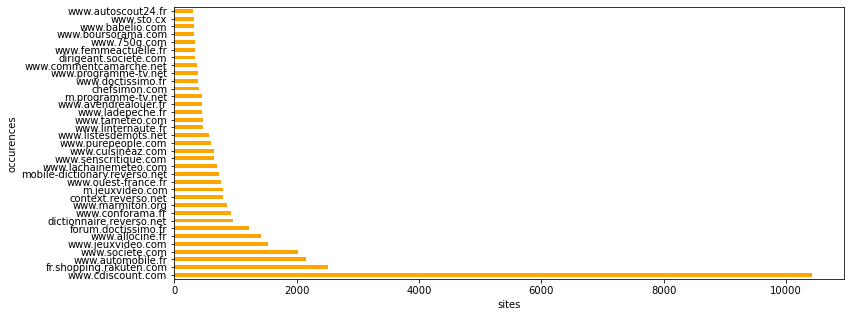

In [21]:
netloc_counts_top.plot.barh(figsize=(12,5),color='orange')
plt.xlabel('sites')
plt.ylabel('occurences')

In [22]:
netloc_counts[netloc_counts == 1]

sciencesphysiquescollegemozart.over-blog.com    1
picosico.org                                    1
rc10.over-blog.com                              1
www.alouette.fr                                 1
recettes-biogourmandes-anne-so.com              1
                                               ..
cueillette-cie.over-blog.com                    1
systemesvortex.over-blog.com                    1
speed.schulterglatze.de                         1
lamaternelledelila.over-blog.com                1
quiz.voici.fr                                   1
Name: netloc, Length: 3211, dtype: int64

<ipython-input-23-b747b1226627>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df_websites[df_parsed.day==i]


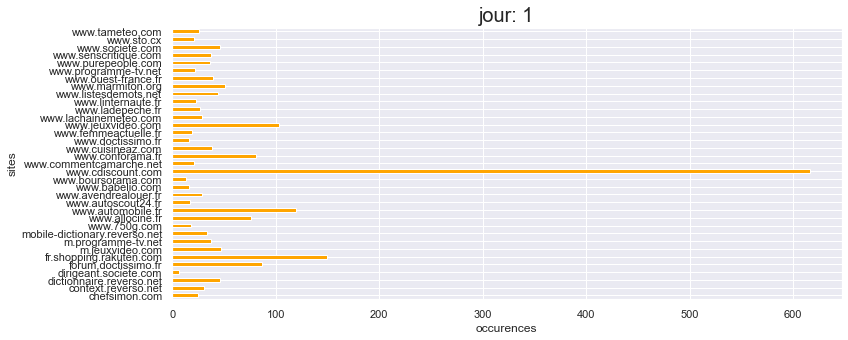

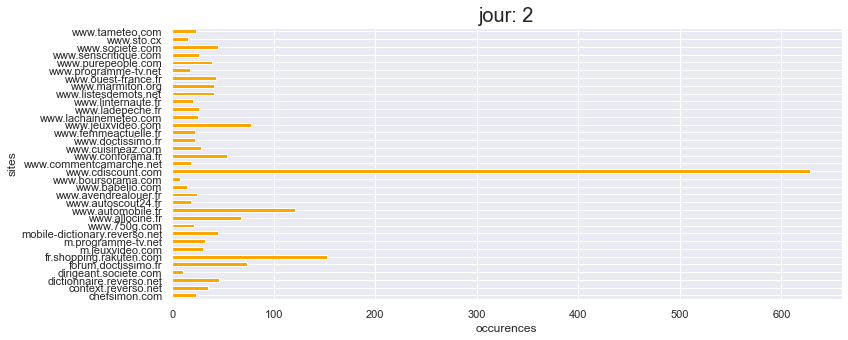

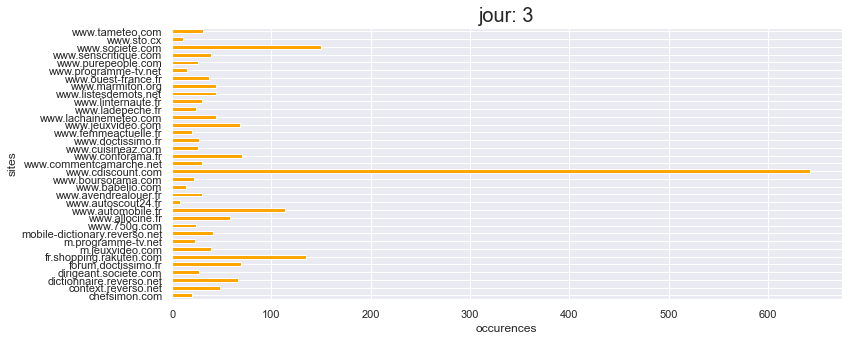

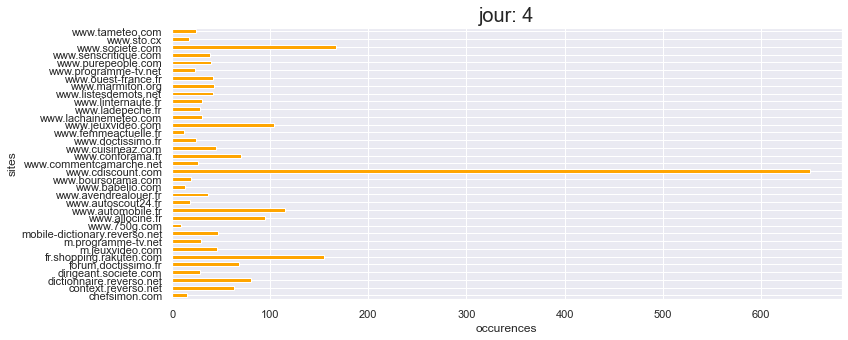

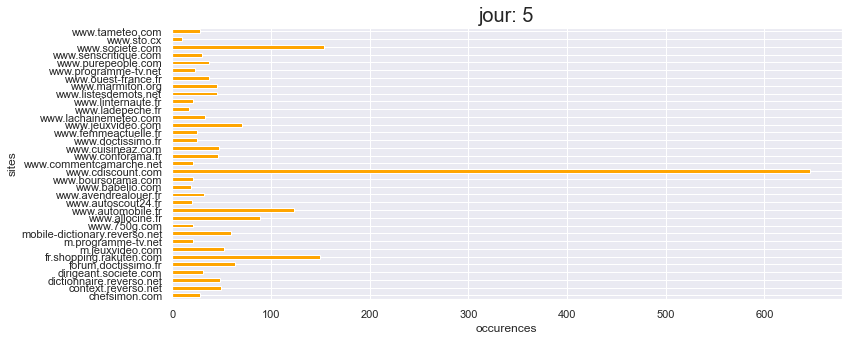

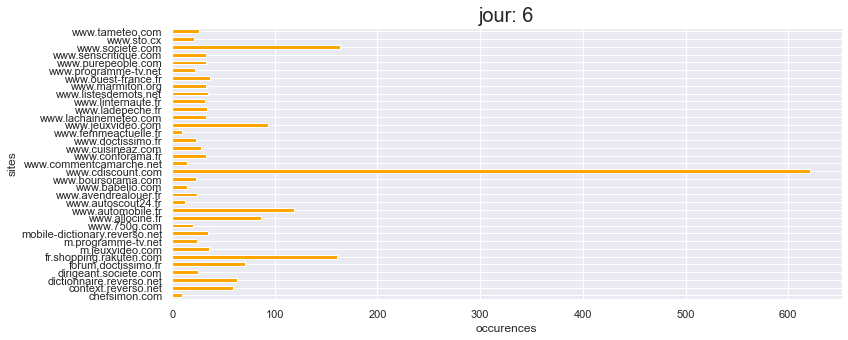

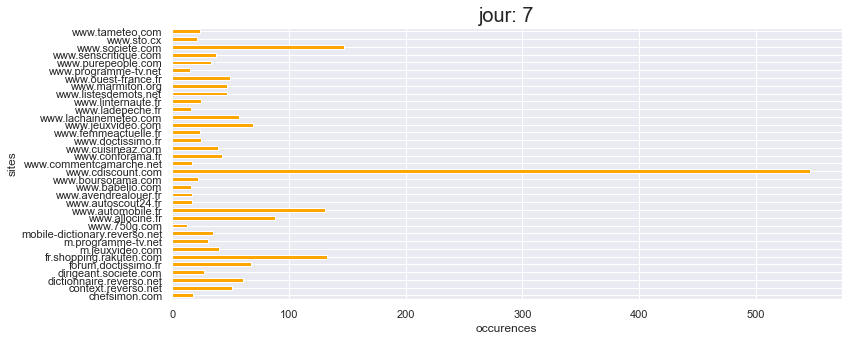

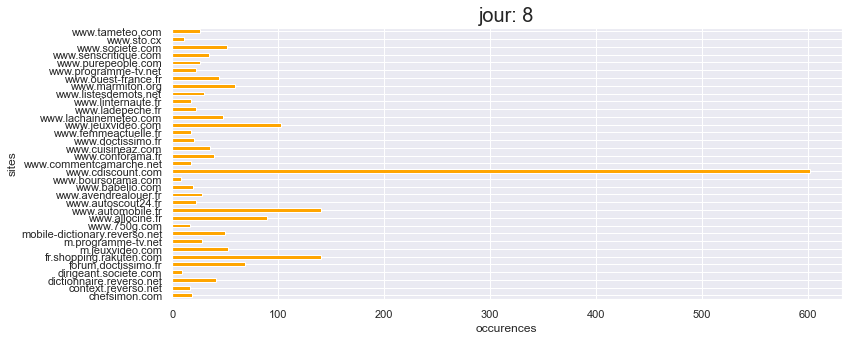

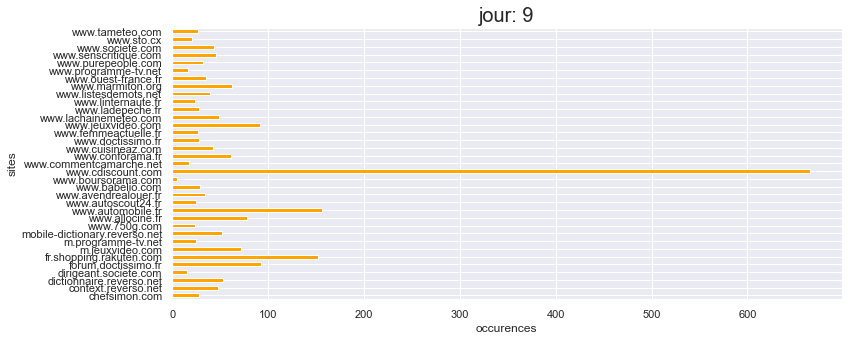

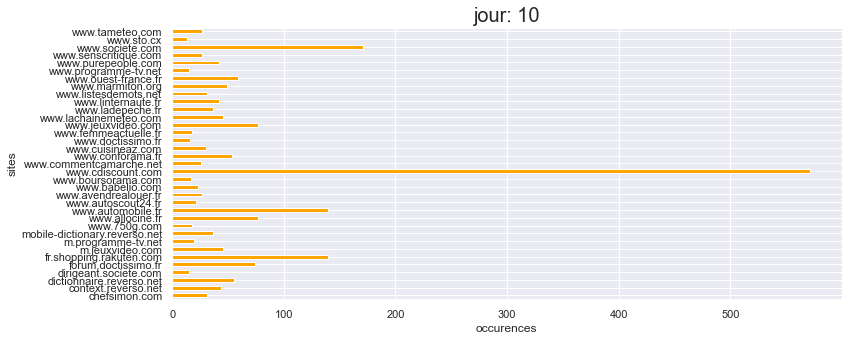

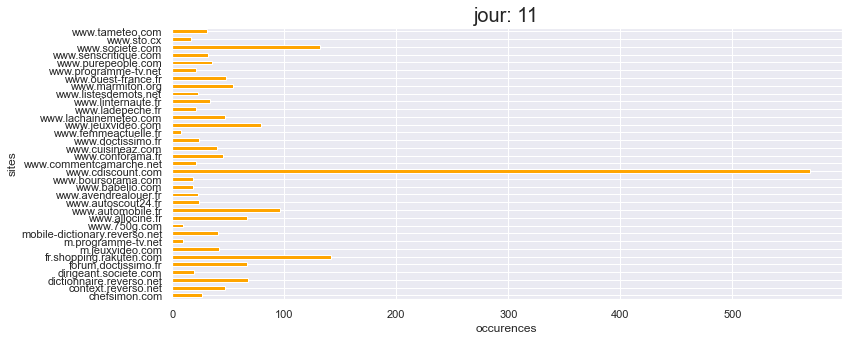

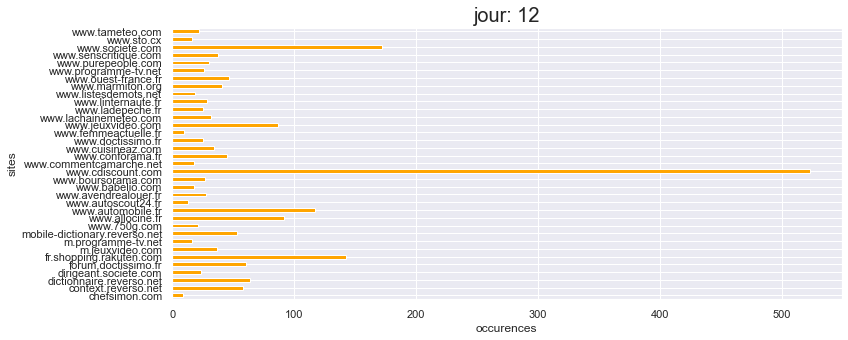

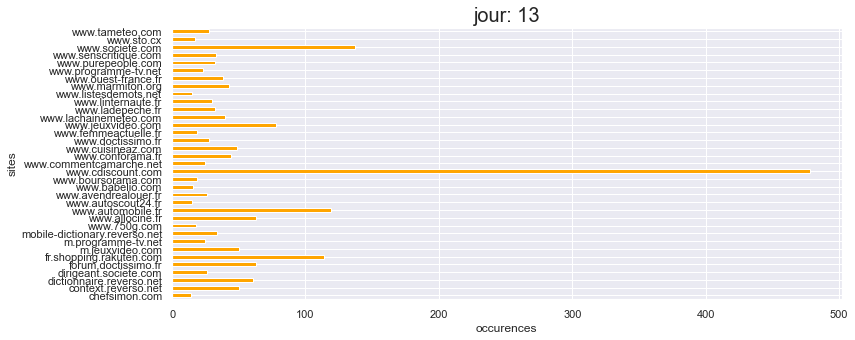

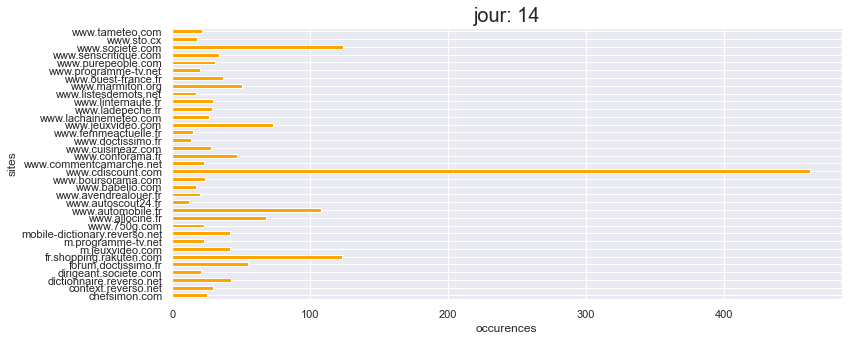

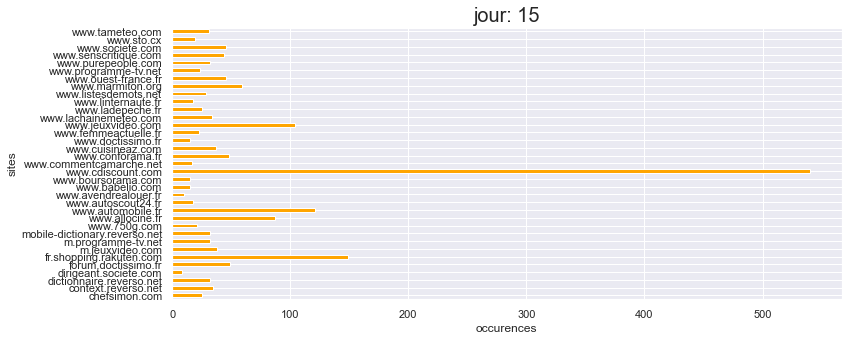

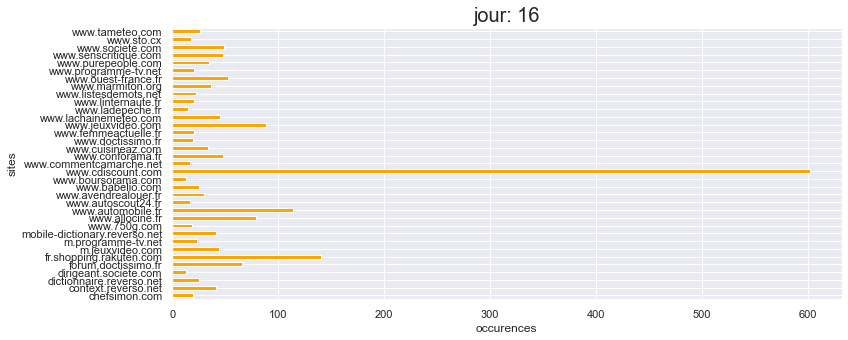

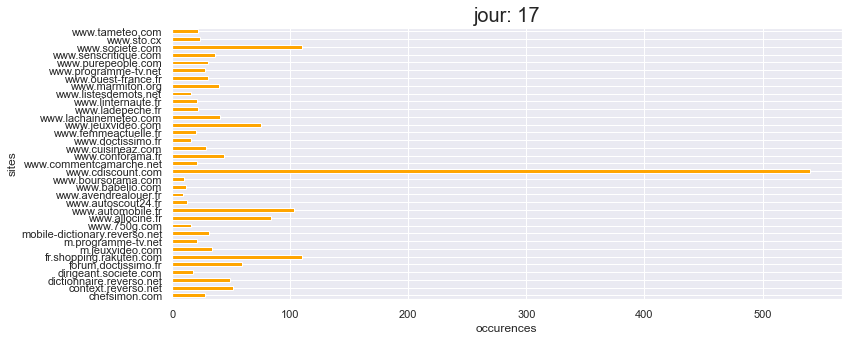

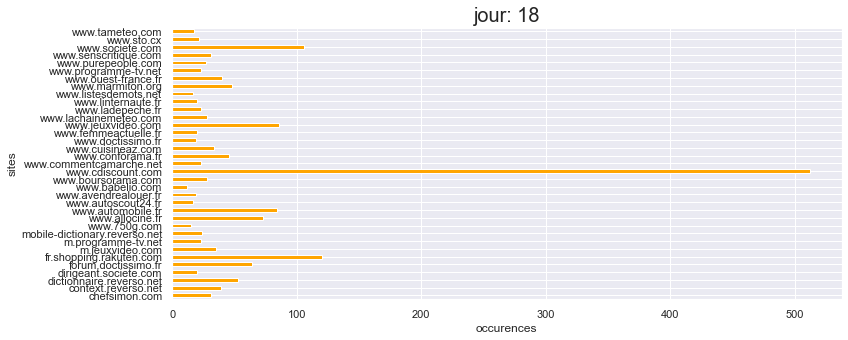

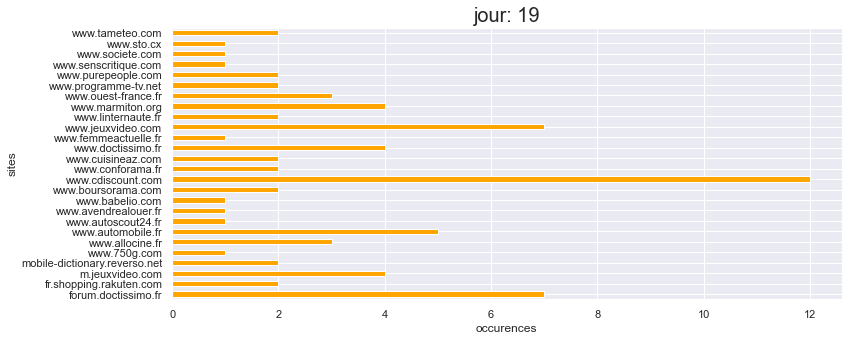

In [23]:
websites = netloc_counts[netloc_counts > 300].index 
df_websites = df_parsed[df_parsed['netloc'].isin(websites)]
for i in range(1,20):
    subset = df_websites[df_parsed.day==i]
    counts = subset.netloc.value_counts().sort_index()
    sns.set(font_scale = 1)
    
    counts.plot.barh(figsize=(12,5),color='orange')
    plt.xlabel('occurences')
    plt.ylabel('sites')
    plt.title("jour: "+str(i), fontsize=20)

    plt.show()

#### Creer une catégorie sous domaine
Diviser les netlocs en parties: sous domaine, domaine et top level domaine

In [382]:
def split_netloc(netloc:str):
    splited_netloc = netloc.rsplit('.', 2)
    if len(splited_netloc) == 2:
        splited_netloc.insert(0, "www")
    return splited_netloc

df_parsed_2 = pd.concat([df_parsed, 
                       pd.DataFrame(list(map(split_netloc, df_parsed.netloc)),
                    columns= ['sous_domaine','domaine','top_domaine'],
                   index=df_parsed.netloc.index) 
                       ], axis=1)
df_parsed_2

url  \
0                               https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                          https://www.mystalk.net/profile/vitoriafcorrea   
2                                                                                    https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html   
3                                                        http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                        https://context.reverso.net/traduction/espagnol-francais/Para+ir   
...                                                                                                                                                   ...   
67590                                                                                         https://www.jeu-concours.biz/gagner-cafetiere-expresso.html   
67591                                                                                                             https://www.sto.cx/book-186042-471.html   
67592                                                                                     http://jeu.info/solution/4-images-1-mot-niveau-2023-a-2060.html   
67593                                                                     https://grossesse.aufeminin.com/forum/levres-gonflees-et-accouchement-fd4242229   
67594  https://www.conforama.fr/chambre-literie/literie/sommier-et-cadre-a-lattes/sommier-avec-coffre-160x200-cm-bultex-asteroid-coloris-bouleau/p/663906   

                               target  day scheme                   netloc  \
0       [1831, 1751, 1192, 745, 1703]    4  https        www.cdiscount.com   
1          [847, 978, 582, 1381, 529]    4  https          www.mystalk.net   
2                     [20, 1077, 294]    4  https           www.lequipe.fr   
3          [381, 935, 1343, 622, 933]    4   http          m.jeuxvideo.com   
4        [692, 1265, 725, 1264, 1266]    4  https      context.reverso.net   
...                               ...  ...    ...                      ...   
67590                [1276, 65, 1113]    1  https     www.jeu-concours.biz   
67591     [608, 617, 1033, 220, 1021]    1  https               www.sto.cx   
67592      [381, 925, 622, 1494, 937]   16   http                 jeu.info   
67593       [638, 253, 419, 558, 401]    1  https  grossesse.aufeminin.com   
67594  [1367, 1372, 1368, 1370, 1369]   16  https         www.conforama.fr   

                                                                                                                             path  \
0                                /bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                         /profile/vitoriafcorrea   
2                                                                                  /Tennis/TennisFicheJoueur1500000000003017.html   
3                                                      /forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                           /traduction/espagnol-francais/Para+ir   
...                                                                                                                           ...   
67590                                                                                             /gagner-cafetiere-expresso.html   
67591                                                                                                       /book-186042-471.html   
67592                                                                            /solution/4-images-1-mot-niveau-2023-a-2060.html  

In [388]:
# verification des valeurs non-type
# df_parsed_2.top_domaine.isna().sum()
# df_parsed_2.scheme.isna().sum()
df_parsed_2.sous_domaine.isna().sum()

0

In [389]:
# nombre de domaines uniques
df_parsed_2.domaine.nunique()

2309

In [390]:
domaine_counts = df_parsed_2.domaine.value_counts()
domaine_counts

cdiscount             10681
reverso                2652
rakuten                2514
societe                2363
jeuxvideo              2324
                      ...  
la-thierache              1
lafabriqueauxreves        1
rodzice                   1
lasavoie                  1
omglyrics                 1
Name: domaine, Length: 2309, dtype: int64

notre dataset est composé majoritairement du site `cdiscount` avec plus de 10000 exemples.

In [391]:
domaine_counts_top = domaine_counts[domaine_counts > 400]
domaine_counts_top

cdiscount           10681
reverso              2652
rakuten              2514
societe              2363
jeuxvideo            2324
automobile           2148
over-blog            2133
doctissimo           1638
allocine             1422
ouest-france          955
conforama             922
aufeminin             875
programme-tv          861
marmiton              854
lachainemeteo         693
linternaute           687
orange                668
senscritique          649
cuisineaz             649
purepeople            607
listesdemots          563
commentcamarche       560
journaldesfemmes      554
lefigaro              496
tameteo               466
ladepeche             453
mobile                450
avendrealouer         449
lemonde               446
ooreka                432
autoscout24           427
femmeactuelle         414
Name: domaine, dtype: int64

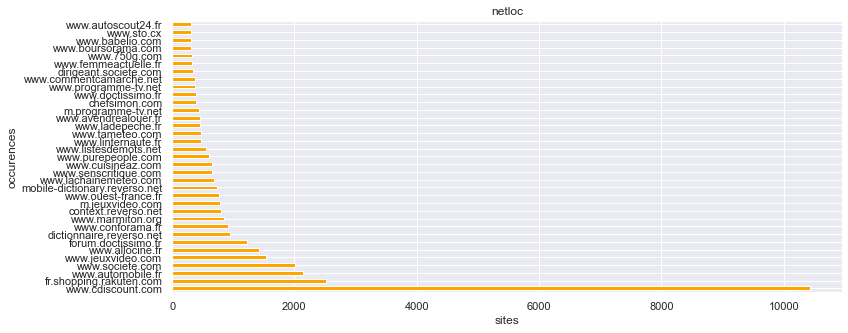

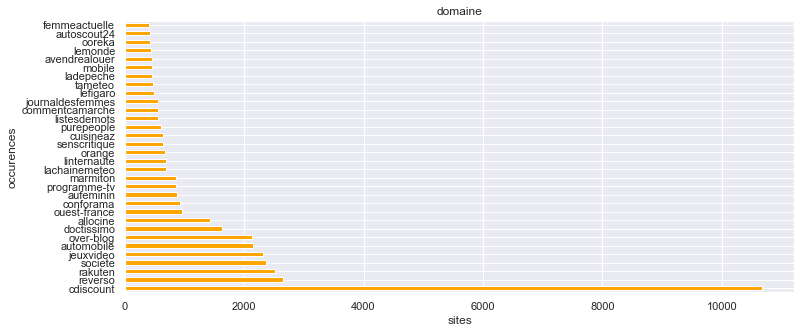

In [392]:
# comparaison entre les top netlocs et domaines
netloc_counts_top.plot.barh(figsize=(12,5),color='orange')
plt.xlabel('sites')
plt.ylabel('occurences')
plt.title("netloc")
plt.show()

domaine_counts_top.plot.barh(figsize=(12,5),color='orange')
plt.xlabel('sites')
plt.ylabel('occurences')
plt.title("domaine")
plt.show()

In [393]:
# Nombre de domaines / netloc avec une occurence de 1
domaine_counts_last = domaine_counts[domaine_counts == 1]
netloc_countst_last = netloc_counts[netloc_counts == 1]
print(len(domaine_counts_last))
print(len(netloc_countst_last))

1060
3211


#### Aller plus loin dans le feature engineering
Nous pouvons aller encore plus loin avec le feature engineering, comme par exemple essayer de comprendre les relations entre le contenu du path et les différentes colonnes de notre dataset, ou d'essayer de diviser les sous-domaines, creer des sous catégories à partir de path, ou de comprendre aussi la relation entre le jour et les domaines, sous-domaines ect...

Pour cette première version de notre Exploratory Data Analysis, nous allons nous arreter là et proceder à la tokenisation du path afin de creer une description  à partir de ce dernier. 

Pour la suite, nous pouvons utiliser et combiner plusieurs des techniques suivantes sur colonne path_description :
- Les "stop words" sont des mots qui se retrouvent très fréquemment dans la langue française. Ces mots n’apportent pas d’information dans les tâches de NLP. 
Aussi, nos URLS ne contiennent pas de mots avec des accents et il serait donc judicieux d'enlever les accents des stop words
- Enlever les mots htm, php, aspx, html ? test avec et sans et voir la corrélation
- Supprimer meme mots qui se suient  (chambre-literie/literie-sommier)
- Supprimez tous les caractères non pertinents tels que les caractères non alphanumériques et numéro bizarres et longs
- Convertir les mots en minuscule. 
- Essayer de combiner les mots mal orthographiés ou orthographiés alternativement  en une seule représentation, séparer les mots collés en minuscule (sauter cette étape je pense)
- Lemmatization et stemming
- Enlever les mots composés de 1 seul caractère 
- Enlever les chiffres (à voir) 
- Enlever les mots spéciaux: htm, php, aspx, html (peut afficher le dernier token puis faire un count pour les retrouver)
- Utiliser les tokenizers simples ou utiliser les tokenizers déja pré-entrainés comme celui de bert qui inclus : BPE, (lowercase et Uppercase), pour le transformer

#### Tokenisation: 
NTLK word_tokenize(phrase, language='french') ou  Spacy fr_core_news_sm modèle small: 
- UD French Sequoia v2.5  (Candito, Marie; Seddah, Djamé; Perrier, Guy; Guillaume, Bruno)
- WikiNER (Joel Nothman, Nicky Ringland, Will Radford, Tara Murphy, James R Curran)
- spaCy lookups data (Explosion)

La classe suivante permet de tokenizer les URLs deu dataframe en combinant plusieurs des techniques présentées en haut.
Elle pourrait etre ameliorer plus tard (performance et facilité d'utilisation) si j'ai le temps de le faire dans le code source final de ce projet.

Au final, nous pourrons enlever toutes les méthodes crées et en créer une seule globale qui contiendra une itération qui utilisera les techniques souhaitées afin de rendre le tokenizer plus performant.

In [394]:
class PathTokenizer():
    """ A simple class to tokenize the URL   
        #TODO: throw exception when type is not supported 
        """
    
    def __init__(self):
        self.stemmer = SnowballStemmer(language='french')
        self.stopwords = [unidecode(x) for x in stopwords.words('french')]
        self.special_words = ['htm', 'php', 'aspx', 'html']

    def _clean_text(self, text:str):
        """ 
        remove the symbols from the a url  
        """
        if isinstance(text, str):
            regex = '(\d+|[A-Z][a-z]*)|[+;,\s.!:\'/_%#&$@?~*]|-'
            t = list(filter(None, re.split(regex, text)))
            return t
        else:
            raise TypeError("text must be list")
    
    def _lowercase_text(self, tokens: list):
        if isinstance(tokens, list):
            return [t.lower() for t in tokens]
        else:
            raise TypeError("text must be list")
    
    def _remove_stopwords(self, tokens:list):
        if isinstance(tokens, list):
            return [t for t in tokens if t not in self.stopwords]
        else:
            raise TypeError("tokens must be a list")
            
    def _remove_single(self, tokens: list):
        "remove single elements from list "
        if isinstance(tokens, list):
            return [t for t in tokens if len(t)>1]
        else:
            raise TypeError("tokens must be a list")
            
    def _remove_specials(self, tokens:list):
        if isinstance(tokens, list):
            return [t for t in tokens if t not in self.special_words]
        else:
            raise TypeError("tokens must be a list")
    
    def _remove_numbers(self, tokens:list):
        if isinstance(tokens, list):
            # return [x for x in text if not any(x1.isdigit() for x1 in x)]
            return [t for t in tokens if not t.isdigit()]
        else:
            raise TypeError("tokens must be a list") 
            
    def _stem_text(self, tokens:list):
        if isinstance(tokens, list):        
            return [self.stemmer.stem(token) for token in tokens]
        else:
            raise TypeError("tokens must be a list")        
        
    def _tokenize_text(self, text:str):
        return word_tokenize(text, language='french')
        
    def _join_words(self, text:list):
        """ build a sentence from a list of words and separates them with a sapce"""
        return " ".join(text)
    
    def _split_words(self, text:str):
        return text.split(' ')
    
    def clean_df(self, df_column, funcs_list):
        "Apply multiple functions on a column of a dataframe"
        for func in funcs_list:
            df_column = df_column.apply(func)
        return df_column

In [395]:
path_tokenizer = PathTokenizer()

funcs = [path_tokenizer._clean_text, path_tokenizer._remove_numbers, path_tokenizer._remove_single, path_tokenizer._stem_text,
        path_tokenizer._lowercase_text, path_tokenizer._remove_specials, path_tokenizer._remove_stopwords ]

df_parsed_2['tokens_path'] = path_tokenizer.clean_df(df_parsed_2.path, funcs)
df_parsed_2

url  \
0                               https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                          https://www.mystalk.net/profile/vitoriafcorrea   
2                                                                                    https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html   
3                                                        http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                        https://context.reverso.net/traduction/espagnol-francais/Para+ir   
...                                                                                                                                                   ...   
67590                                                                                         https://www.jeu-concours.biz/gagner-cafetiere-expresso.html   
67591                                                                                                             https://www.sto.cx/book-186042-471.html   
67592                                                                                     http://jeu.info/solution/4-images-1-mot-niveau-2023-a-2060.html   
67593                                                                     https://grossesse.aufeminin.com/forum/levres-gonflees-et-accouchement-fd4242229   
67594  https://www.conforama.fr/chambre-literie/literie/sommier-et-cadre-a-lattes/sommier-avec-coffre-160x200-cm-bultex-asteroid-coloris-bouleau/p/663906   

                               target  day scheme                   netloc  \
0       [1831, 1751, 1192, 745, 1703]    4  https        www.cdiscount.com   
1          [847, 978, 582, 1381, 529]    4  https          www.mystalk.net   
2                     [20, 1077, 294]    4  https           www.lequipe.fr   
3          [381, 935, 1343, 622, 933]    4   http          m.jeuxvideo.com   
4        [692, 1265, 725, 1264, 1266]    4  https      context.reverso.net   
...                               ...  ...    ...                      ...   
67590                [1276, 65, 1113]    1  https     www.jeu-concours.biz   
67591     [608, 617, 1033, 220, 1021]    1  https               www.sto.cx   
67592      [381, 925, 622, 1494, 937]   16   http                 jeu.info   
67593       [638, 253, 419, 558, 401]    1  https  grossesse.aufeminin.com   
67594  [1367, 1372, 1368, 1370, 1369]   16  https         www.conforama.fr   

                                                                                                                             path  \
0                                /bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html   
1                                                                                                         /profile/vitoriafcorrea   
2                                                                                  /Tennis/TennisFicheJoueur1500000000003017.html   
3                                                      /forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm   
4                                                                                           /traduction/espagnol-francais/Para+ir   
...                                                                                                                           ...   
67590                                                                                             /gagner-cafetiere-expresso.html   
67591                                                                                                       /book-186042-471.html   
67592                                                                            /solution/4-images-1-mot-niveau-2023-a-2060.html  

- Le code peut etre amélioré pour l'étape de production
- Note: quelques mots apparaissent en double et se suivent (voir si c'est pertinent de les garder)
- Note: supprimer les mots contenant que 2 lettres? 

 #### Occurences des tokens dans path

In [397]:
from collections import Counter
# ou explode 
all_tokens_path = [item for sublist in df_parsed_2.tokens_path for item in sublist]
s_tokens_path = pd.Series(all_tokens_path)
s_tokens_path.value_counts()

franc         4441
search        3692
recet         3615
forum         3401
articl        2596
              ... 
shall            1
anytran          1
extinguish       1
arconic          1
mucikar          1
Length: 49210, dtype: int64

In [398]:
s_tokens_path.nunique() 

49210

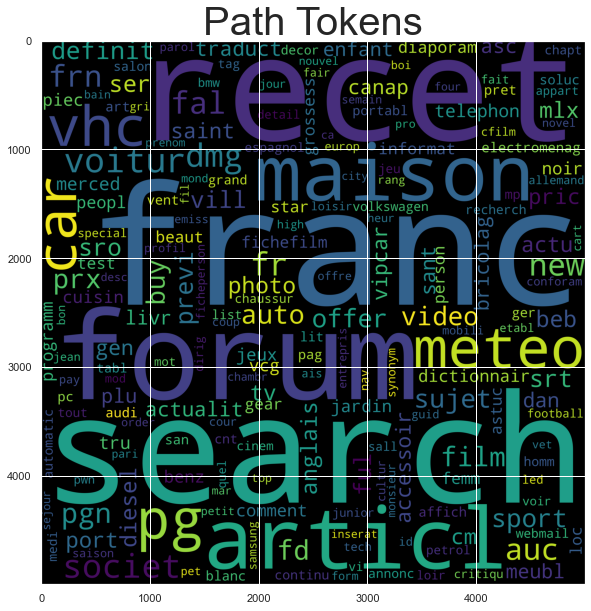

In [400]:
cloud_path_tokens = WordCloud(
                          background_color='black',
                          collocations=False,
                          width=5000,
                          height=5000
                         ).generate(" ".join(all_tokens_path))
plt.figure(figsize = (10,10))
plt.title("Path Tokens",fontsize=40)
plt.imshow(cloud_path_tokens)

In [406]:
df_parsed_2.scheme.value_counts()

https    57705
http      9890
Name: scheme, dtype: int64

In [407]:
print(df_parsed_2.top_domaine.nunique())
df_parsed_2.top_domaine.value_counts()

84


com    34979
fr     20410
net     5623
org     1552
de      1413
       ...  
nc         1
dog        1
ba         1
ca         1
fi         1
Name: top_domaine, Length: 84, dtype: int64

In [408]:
df_parsed_2.columns

Index(['url', 'target', 'day', 'scheme', 'netloc', 'path', 'sous_domaine',
       'domaine', 'top_domaine', 'tokens_path'],
      dtype='object')

In [409]:
df_cleaned = df_parsed_2.drop(['url', 'path', 'scheme', 'netloc'], axis=1)
df_cleaned.head(5)

target  day sous_domaine    domaine top_domaine  \
0  [1831, 1751, 1192, 745, 1703]    4          www  cdiscount         com   
1     [847, 978, 582, 1381, 529]    4          www    mystalk         net   
2                [20, 1077, 294]    4          www    lequipe          fr   
3     [381, 935, 1343, 622, 933]    4            m  jeuxvideo         com   
4   [692, 1265, 725, 1264, 1266]    4      context    reverso         net   

                                                   tokens_path  
0  [bricolag, electricit, batter, plomb, ah, ova, toplux, ova]  
1                                       [profil, vitoriafcorr]  
2                                     [ten, ten, fich, joueur]  
3                    [forum, guild, fourm, legionnair, recrut]  
4                               [traduct, espagnol, franc, ir]

In [410]:
# sous_domaine: 
(df_cleaned.sous_domaine.values != '').sum()   

67595

# Multi label data analysis 

Contrairement à la classification où chaque exemple est associé une seule classe, la classification multi-label associe plusieurs catégories à un exemple.


In [411]:
mlb = MultiLabelBinarizer()
targets_encoded = pd.DataFrame(mlb.fit_transform(df_cleaned.target),
                   columns=mlb.classes_,
                   index=df_cleaned.target.index)
targets_encoded

100  1000  1001  1002  1003  1004  1005  1006  1007  1008  ...  990  \
0        0     0     0     0     0     0     0     0     0     0  ...    0   
1        0     0     0     0     0     0     0     0     0     0  ...    0   
2        0     0     0     0     0     0     0     0     0     0  ...    0   
3        0     0     0     0     0     0     0     0     0     0  ...    0   
4        0     0     0     0     0     0     0     0     0     0  ...    0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
67590    0     0     0     0     0     0     0     0     0     0  ...    0   
67591    0     0     0     0     0     0     0     0     0     0  ...    0   
67592    0     0     0     0     0     0     0     0     0     0  ...    0   
67593    0     0     0     0     0     0     0     0     0     0  ...    0   
67594    0     0     0     0     0     0     0     0     0     0  ...    0   

       991  992  993  994  995  996  997  998  999  
0        0    0    0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
67590    0    0    0    0    0    0    0    0    0  
67591    0    0    0    0    0    0    0    0    0  
67592    0    0    0    0    0    0    0    0    0  
67593    0    0    0    0    0    0    0    0    0  
67594    0    0    0    0    0    0    0    0    0  

[67595 rows x 1903 columns]

In [412]:
targets_decoded = mlb.inverse_transform(targets_encoded.values)
# targets_decoded

In [413]:
df_cleaned_2 = pd.concat([df_cleaned, targets_encoded], axis=1)
df_cleaned_2.head(5)

target  day sous_domaine    domaine top_domaine  \
0  [1831, 1751, 1192, 745, 1703]    4          www  cdiscount         com   
1     [847, 978, 582, 1381, 529]    4          www    mystalk         net   
2                [20, 1077, 294]    4          www    lequipe          fr   
3     [381, 935, 1343, 622, 933]    4            m  jeuxvideo         com   
4   [692, 1265, 725, 1264, 1266]    4      context    reverso         net   

                                                   tokens_path  100  1000  \
0  [bricolag, electricit, batter, plomb, ah, ova, toplux, ova]    0     0   
1                                       [profil, vitoriafcorr]    0     0   
2                                     [ten, ten, fich, joueur]    0     0   
3                    [forum, guild, fourm, legionnair, recrut]    0     0   
4                               [traduct, espagnol, franc, ir]    0     0   

   1001  1002  ...  990  991  992  993  994  995  996  997  998  999  
0     0     0  ...    0    0    0    0    0    0    0    0    0    0  
1     0     0  ...    0    0    0    0    0    0    0    0    0    0  
2     0     0  ...    0    0    0    0    0    0    0    0    0    0  
3     0     0  ...    0    0    0    0    0    0    0    0    0    0  
4     0     0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 1909 columns]

#### Nombre d'urls pour chaque target

In [414]:
# Nombre d'urls pour chaque target
df_stats = df_cleaned.explode('target')['target'].value_counts()
df_stats

692     4292
1265    3682
1494    3567
184     3438
474     3086
        ... 
1877       1
5591       1
5605       1
5856       1
5822       1
Name: target, Length: 1903, dtype: int64

- Severe umbalanced dataset: la distribution des classes est inégale (par exemple 1:100 ou plus).
- Méthodes pour gerer ce cas:
1. Over Sampling et Undersampling (augmenter la fréquence de la classe minoritaire ou diminuer la fréquence de la classe majoritaire) 
2. Ensemble Techniques: bagging / boosting / 

<AxesSubplot:title={'center':'Distribution des targets'}, xlabel='targets', ylabel='occurences'>

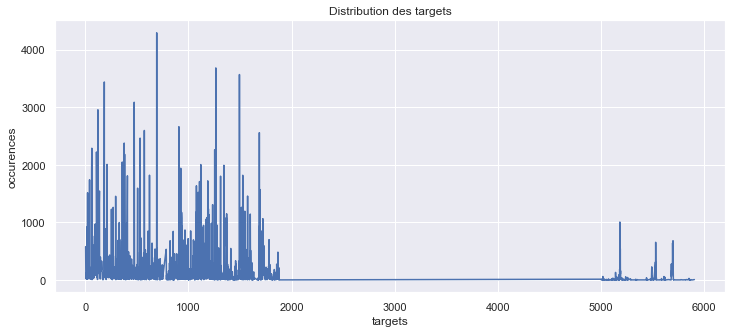

In [415]:
df_stats.index = pd.to_numeric(df_stats.index)
df_stats.sort_index(inplace=True)

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

plt.xlabel('targets')
plt.ylabel('occurences')
plt.title('Distribution des targets')

df_stats.plot(figsize=(12,5) ) 

Nous remarquons que la target "692" se produit 4292 fois, suivi de «1265» qui se produit 3682 fois. 
Le nombre de targets n'est pas le meme dans le dataset, Nous avons des targets qui apparaissent plus de 3000 fois tandis que d'autres apparaissent des centaines de fois ou qu'une seule fois.


#### Nombre d'urls avec de multiple labels

Index(['target', 'day', 'sous_domaine', 'domaine', 'top_domaine',
       'tokens_path', '100', '1000', '1001', '1002',
       ...
       '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
      dtype='object', length=1909)
5    59060
4     4951
3     1252
1     1243
2     1089
dtype: int64


Text(0.5, 1.0, 'distrubtion du nombre de targets par url')

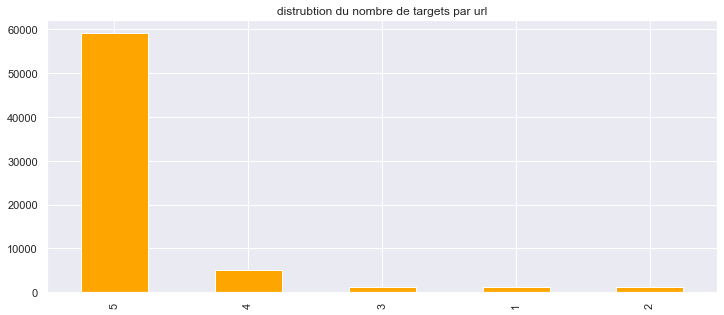

In [416]:
print(df_cleaned_2.columns)
row_sums = df_cleaned_2.iloc[:,6:].sum(axis=1) # ou avec len
multiLabel_counts = row_sums.value_counts()
print(multiLabel_counts)
multiLabel_counts.plot(figsize=(12,5),kind='bar',color='orange')
plt.title("distrubtion du nombre de targets par url")

Nous avons en tout 67595 exemples avec 1903 targets. 
Il y a jusqu'à 59060 d'exemples qui contiennent 5 targets, 4951 qui contiennent 4 targets, 1252 contiennent 3 targets.

En vérifiant le graphique de comptage de la distribution des targets par exemple, nous constatons que la distribution est fortement asymétrique vers la gauche. Il y a un nombre extrêmement élevé d'exemples qui contient 5 targets.

### Combinaisons de targets qui apparaissent souvent:

In [417]:
df_cleaned_2.target.map(tuple).value_counts()

(692, 1265, 108, 1494, 474)       1094
(1513, 907, 906, 1573, 1526)       654
(1171, 1071, 1192, 1533, 1277)     332
(16,)                              325
(1867, 1722, 1367, 1721, 1370)     293
                                  ... 
(980, 1345, 694, 1233, 807)          1
(16, 572, 704, 105, 926)             1
(401, 58, 182, 647)                  1
(5527, 5696, 572, 1002, 462)         1
(1276, 65, 1113)                     1
Name: target, Length: 31253, dtype: int64

#### Occurences de tokens par target

692
(4292, 1909)


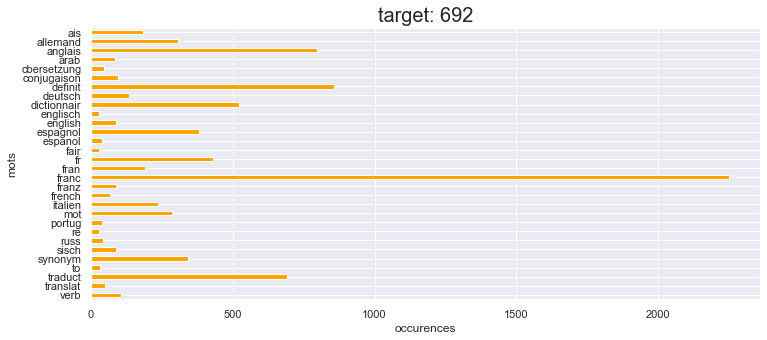

1265
(3682, 1909)


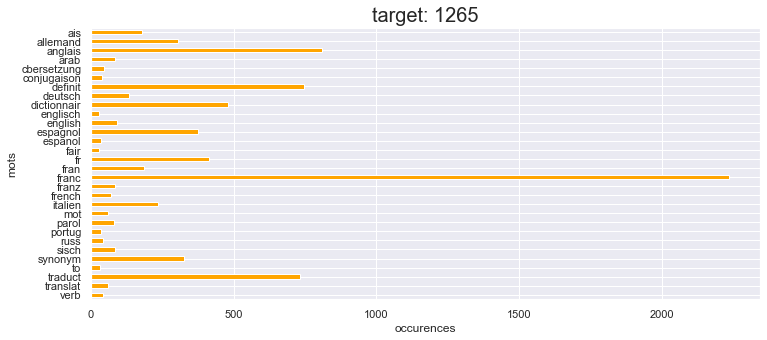

1494
(3567, 1909)


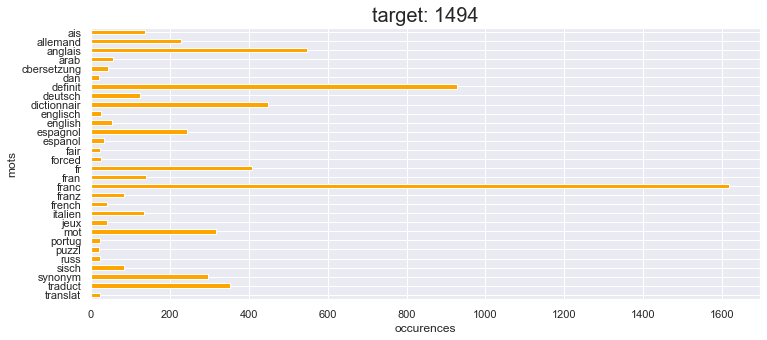

184
(3438, 1909)


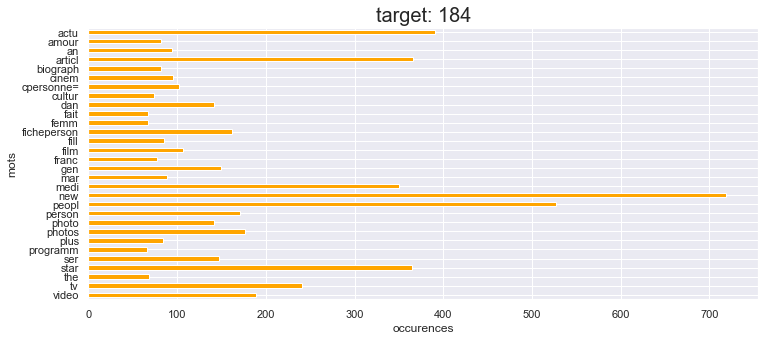

474
(3086, 1909)


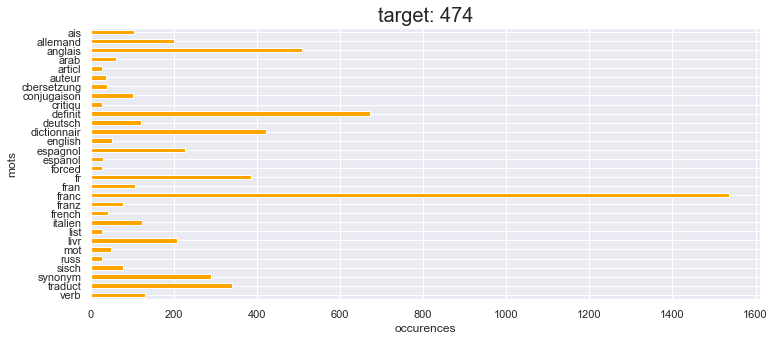

122
(2955, 1909)


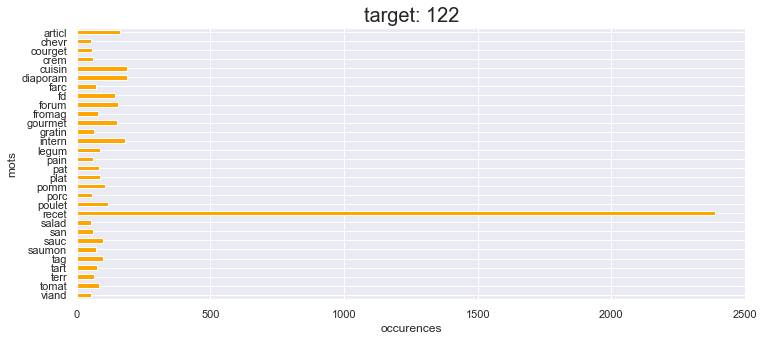

907
(2661, 1909)


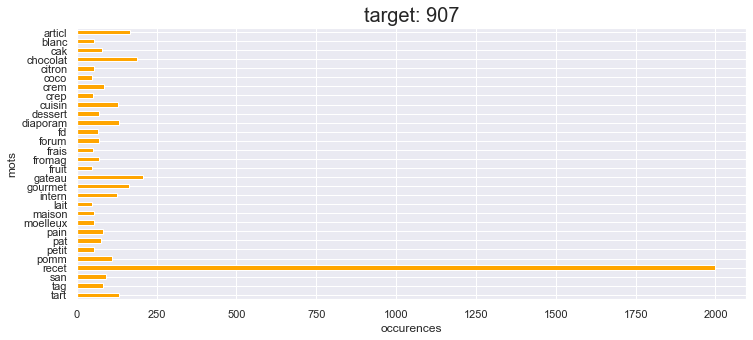

572
(2596, 1909)


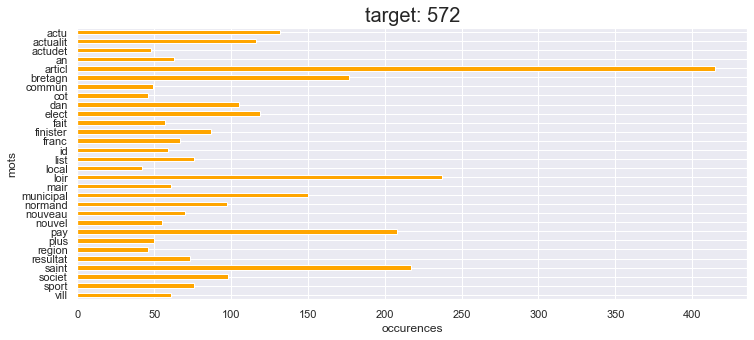

1687
(2558, 1909)


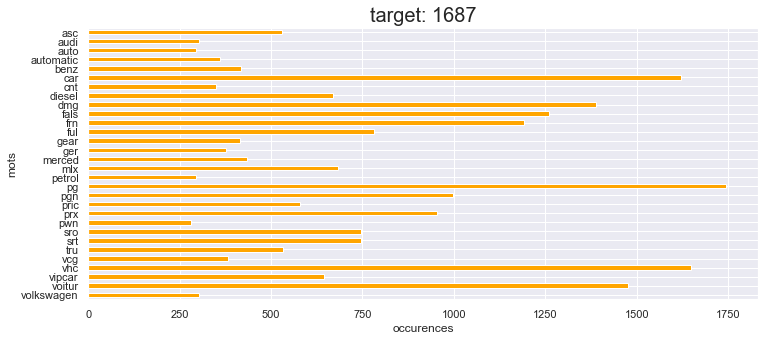

1686
(2531, 1909)


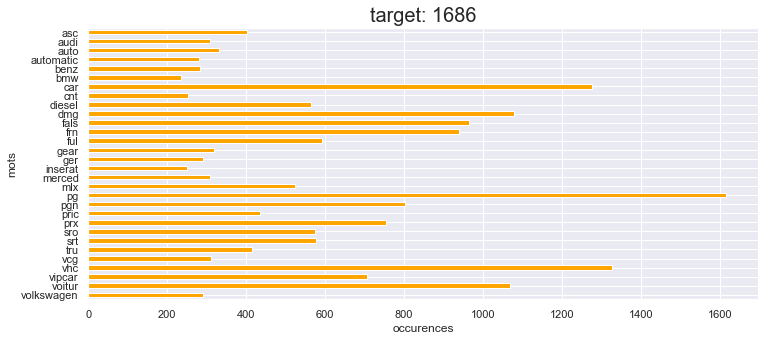

531
(2463, 1909)


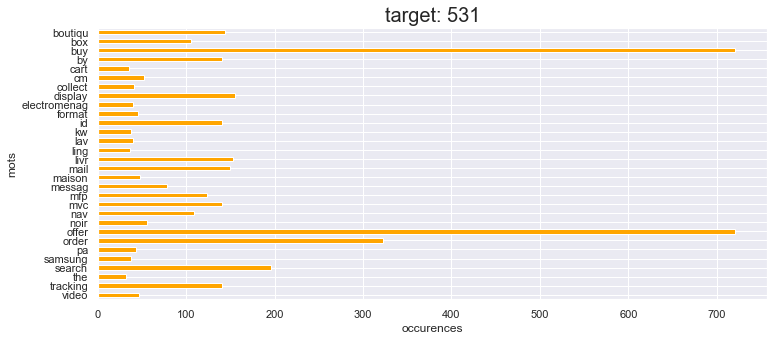

377
(2377, 1909)


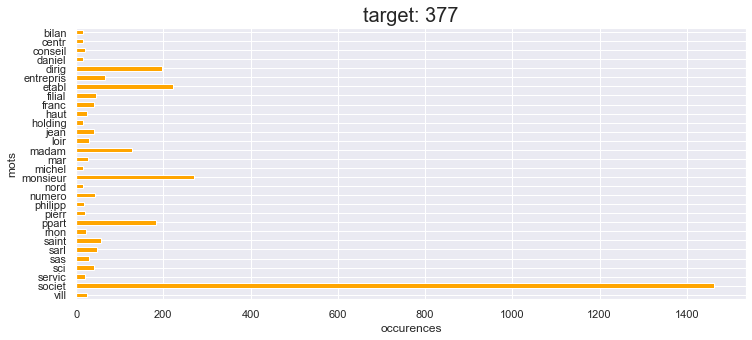

63
(2287, 1909)


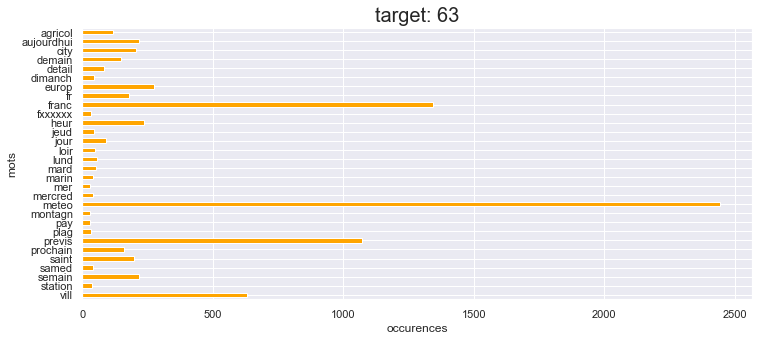

1254
(2260, 1909)


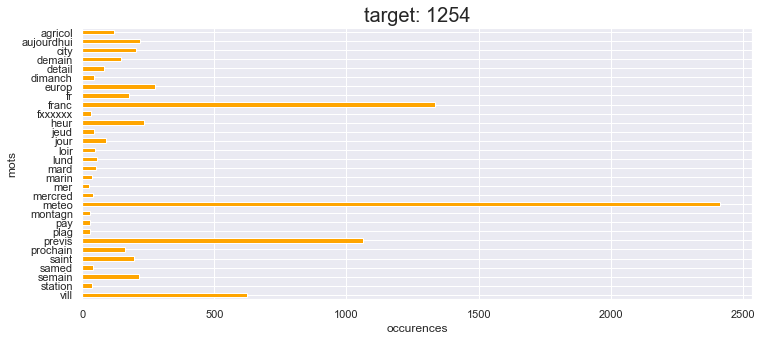

108
(2222, 1909)


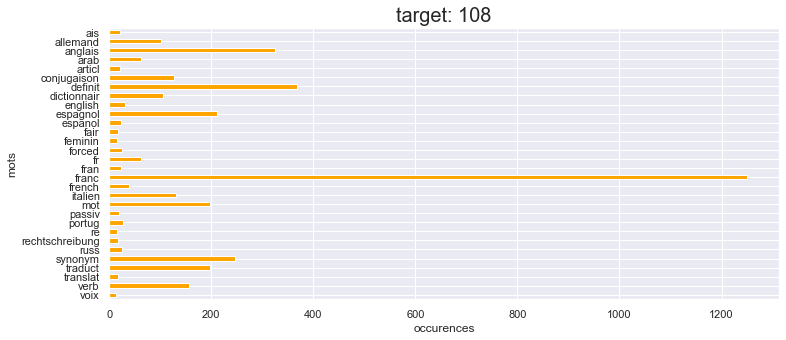

381
(2183, 1909)


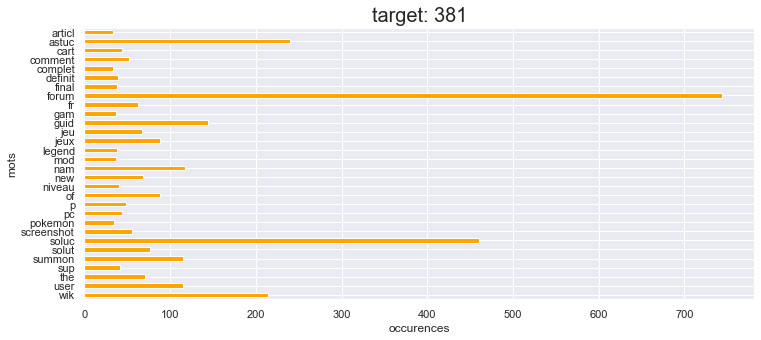

358
(2048, 1909)


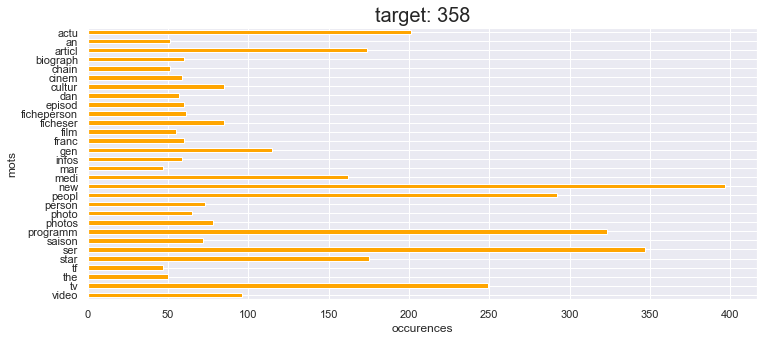

211
(2007, 1909)


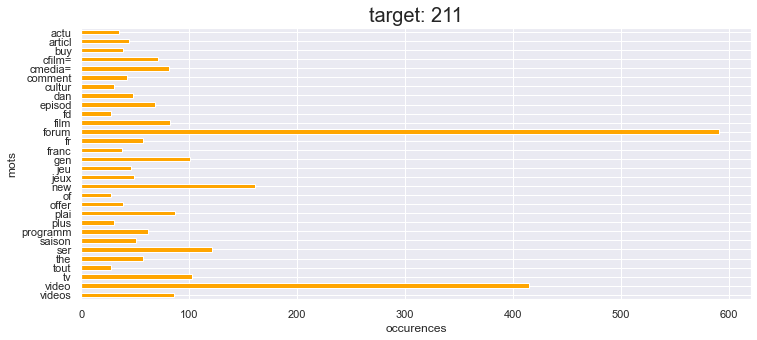

1119
(2004, 1909)


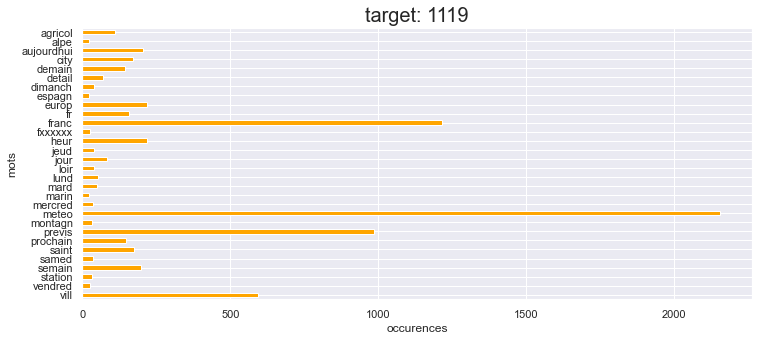

1343
(1991, 1909)


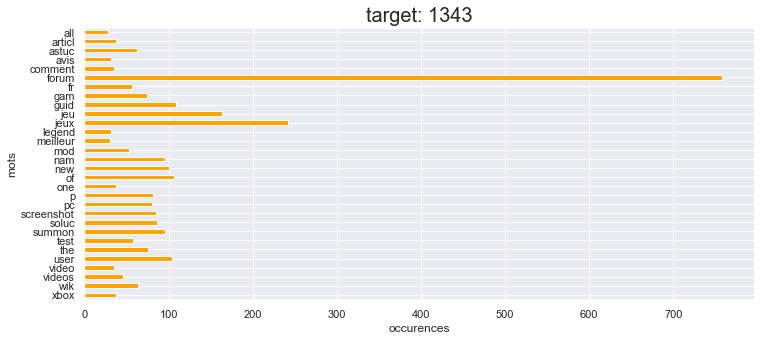

In [418]:
df_top_targets = df_stats.sort_values(ascending=False)[:20]
for target in df_top_targets.index:
    subset = df_cleaned_2[df_cleaned_2[str(target)]==1]
    df_tmp = subset.explode('tokens_path')['tokens_path'].value_counts()[:30].sort_index(ascending=False)
    sns.set(font_scale = 1)
    df_tmp.plot.barh(figsize=(12,5),color='orange')
    plt.xlabel('occurences')
    plt.ylabel('mots')
    plt.title("target: "+str(target), fontsize=20)

    plt.show()


#### Occurences de domaine par target

692
(4292, 1909)


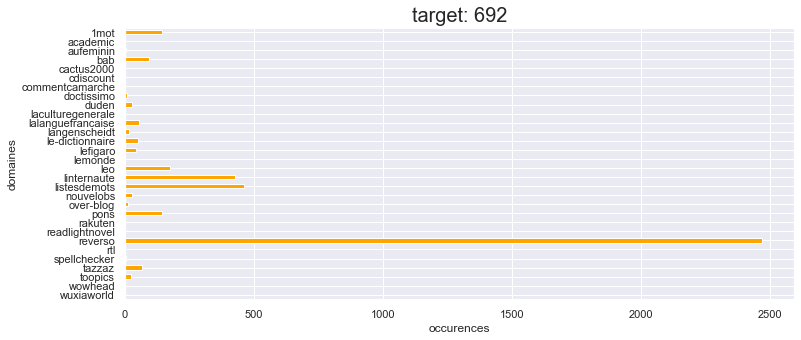

1265
(3682, 1909)


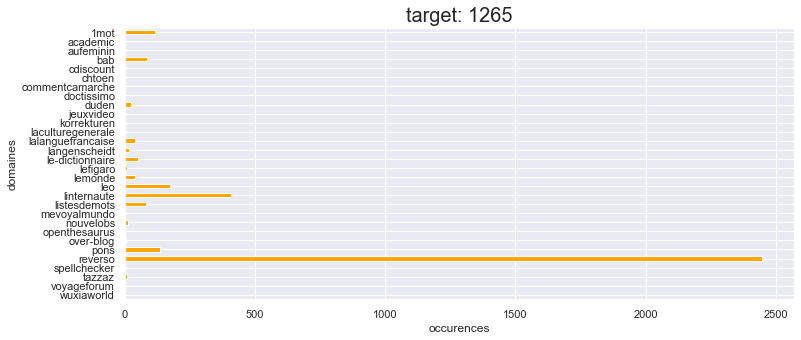

1494
(3567, 1909)


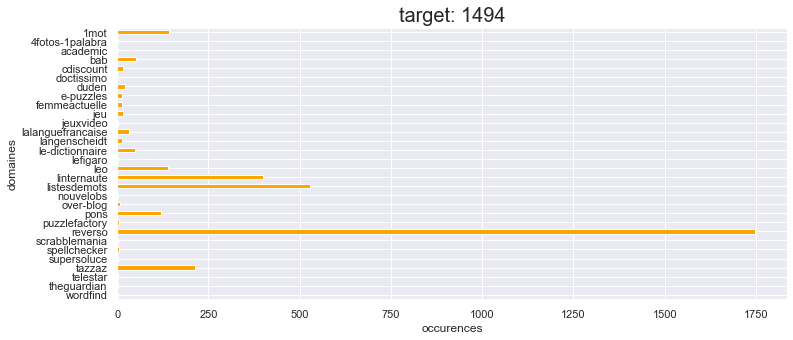

184
(3438, 1909)


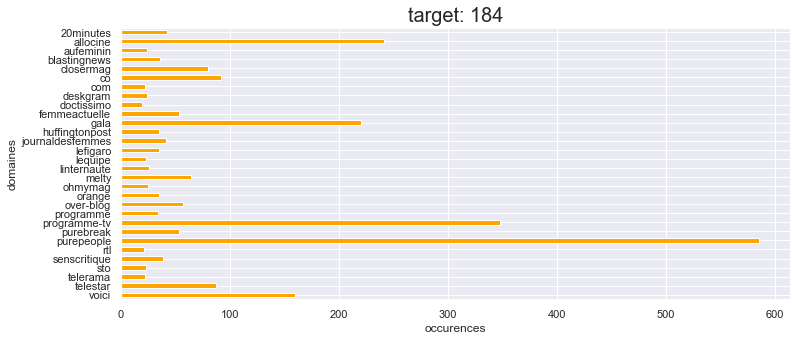

474
(3086, 1909)


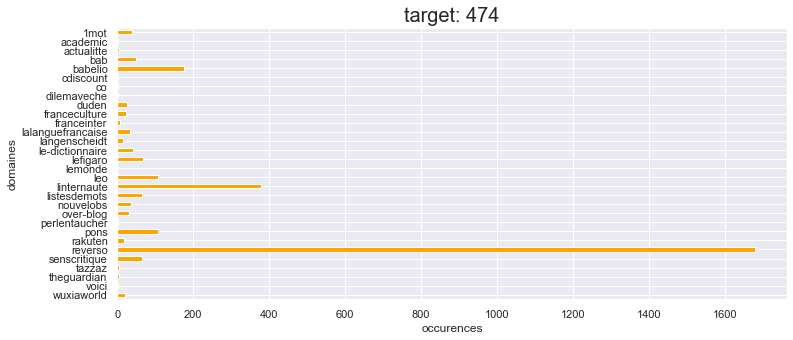

122
(2955, 1909)


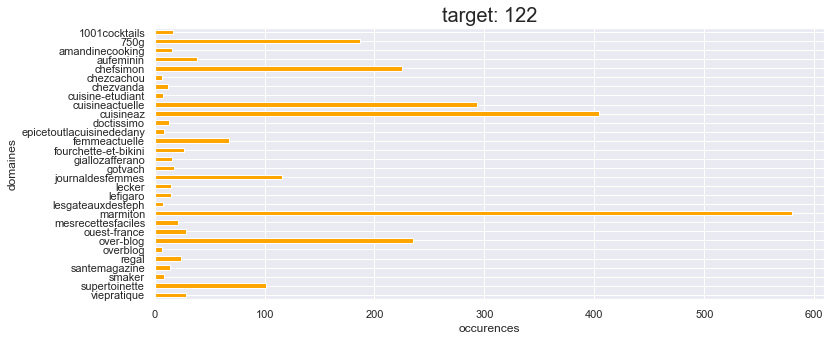

907
(2661, 1909)


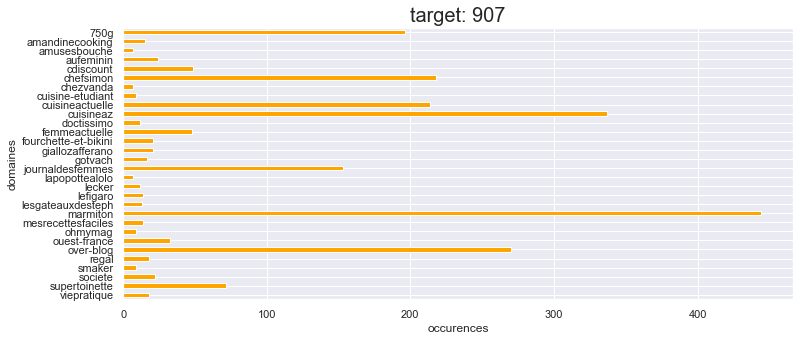

572
(2596, 1909)


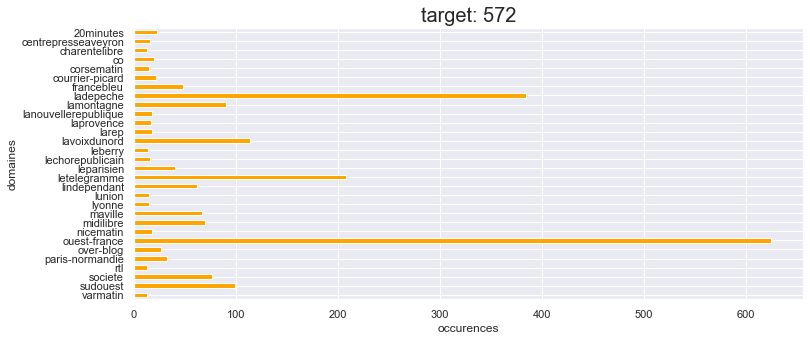

1687
(2558, 1909)


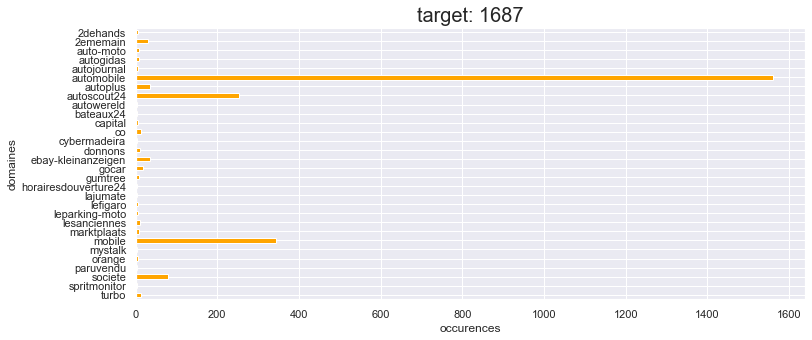

1686
(2531, 1909)


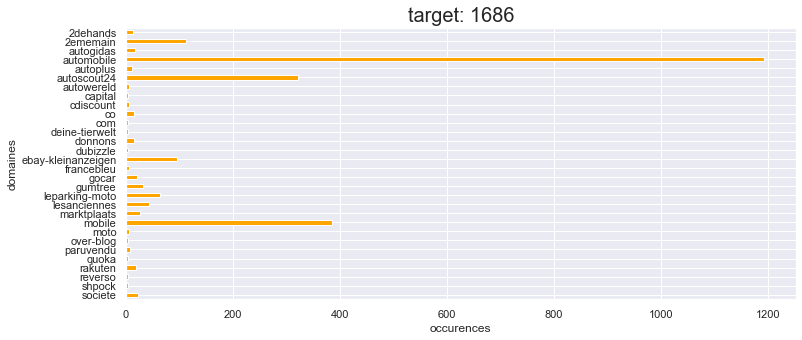

531
(2463, 1909)


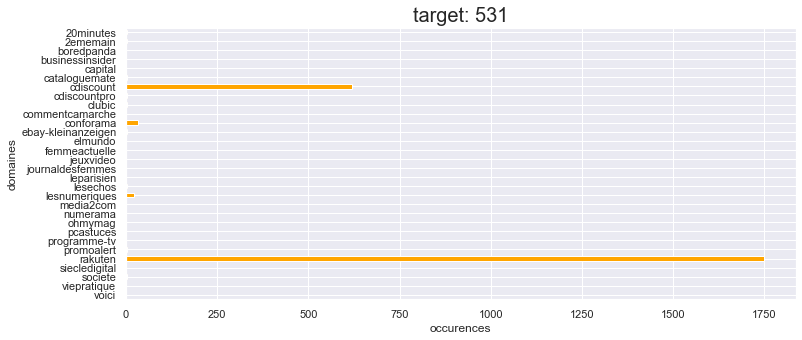

377
(2377, 1909)


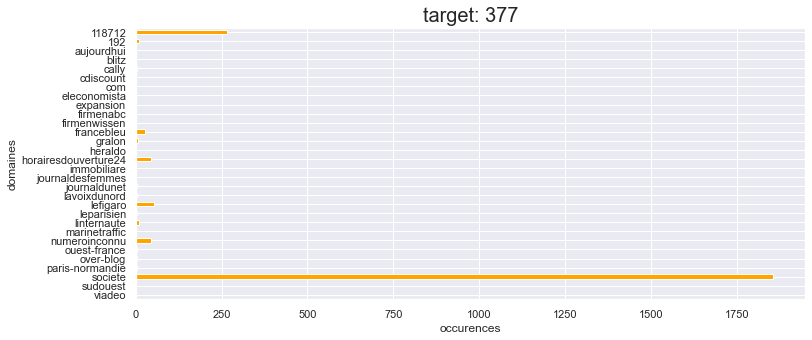

63
(2287, 1909)


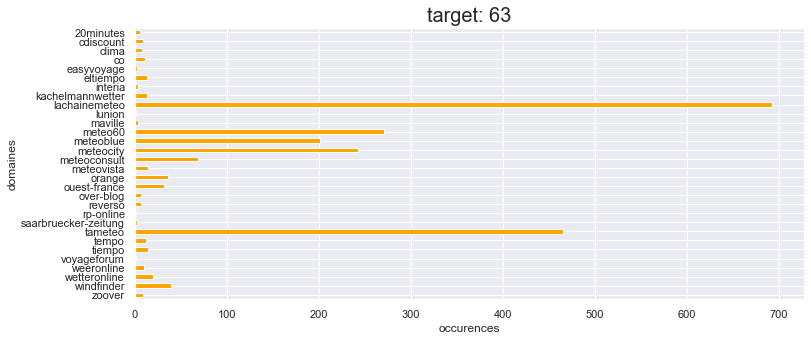

1254
(2260, 1909)


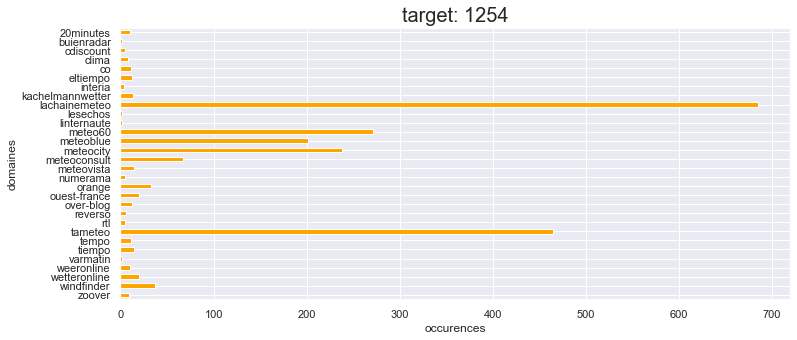

108
(2222, 1909)


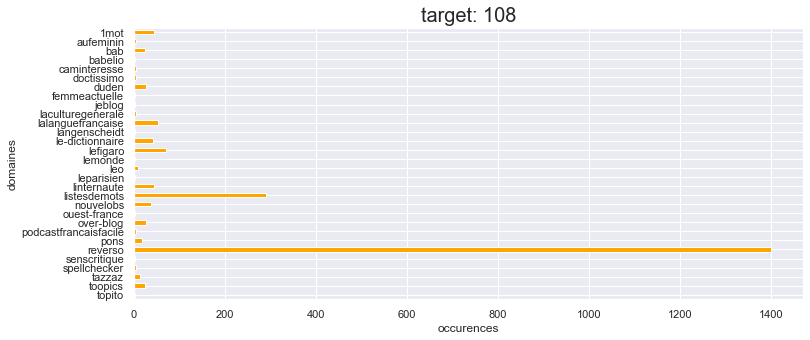

381
(2183, 1909)


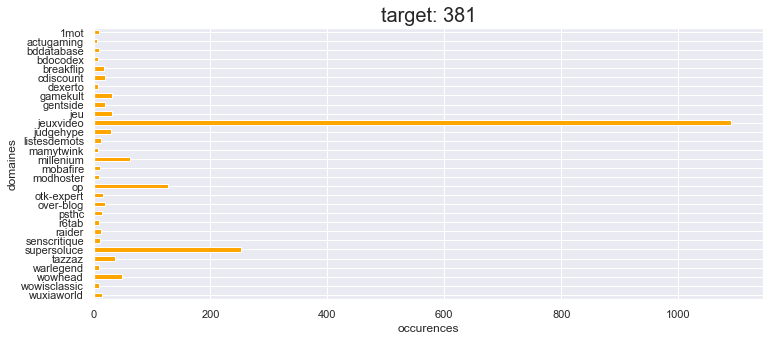

358
(2048, 1909)


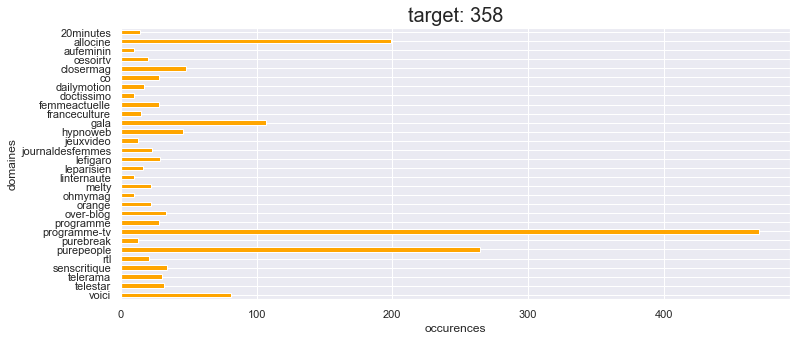

211
(2007, 1909)


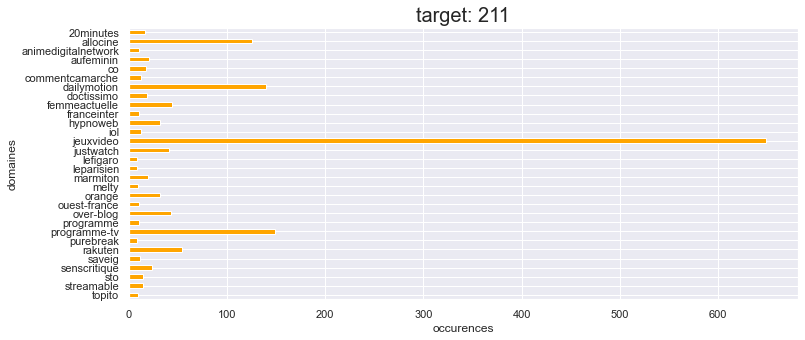

1119
(2004, 1909)


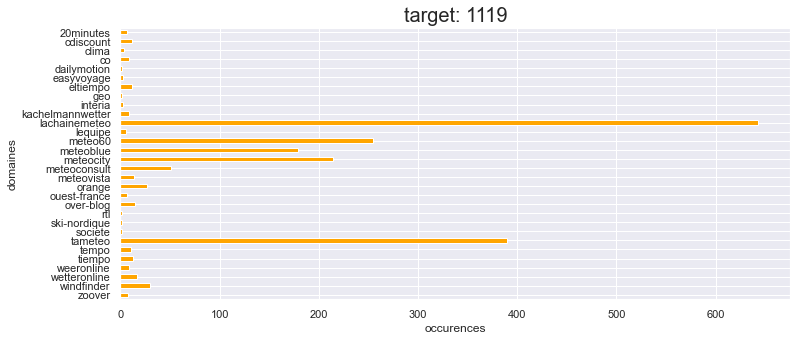

1343
(1991, 1909)


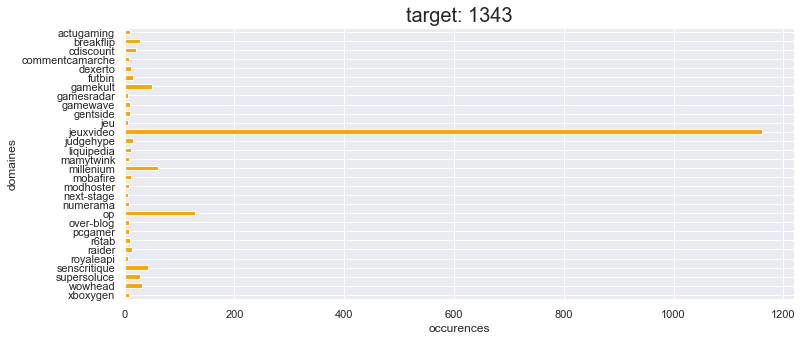

In [419]:
df_top_targets = df_stats.sort_values(ascending=False)[:20]
for target in df_top_targets.index:
    subset = df_cleaned_2[df_cleaned_2[str(target)]==1]
    df_tmp = subset.explode('domaine')['domaine'].value_counts()[:30].sort_index(ascending=False)
    sns.set(font_scale = 1)
    df_tmp.plot.barh(figsize=(12,5),color='orange')
    plt.xlabel('occurences')
    plt.ylabel('domaines')
    plt.title("target: "+str(target), fontsize=20)

    plt.show()


#### Occurences de sous-domaine par targets

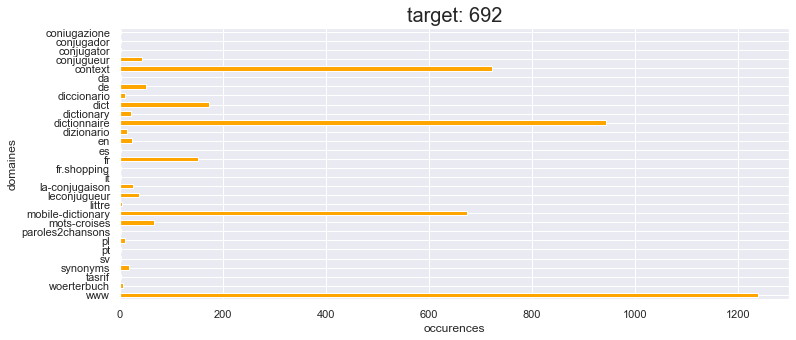

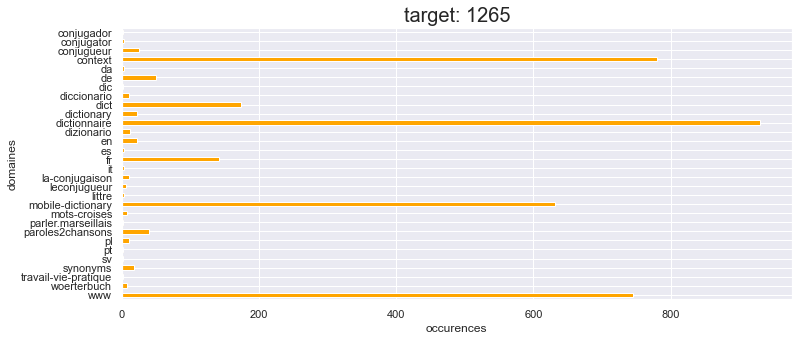

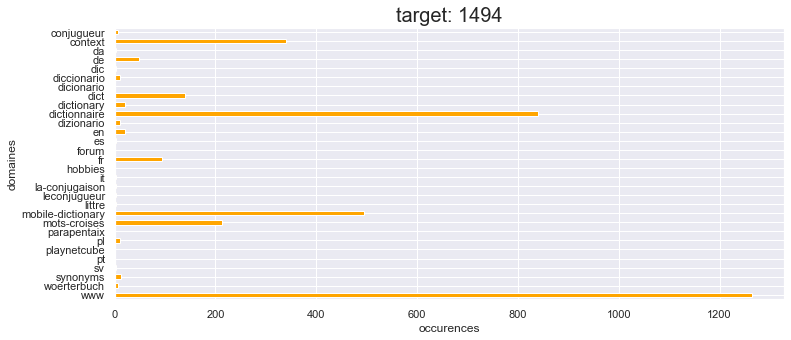

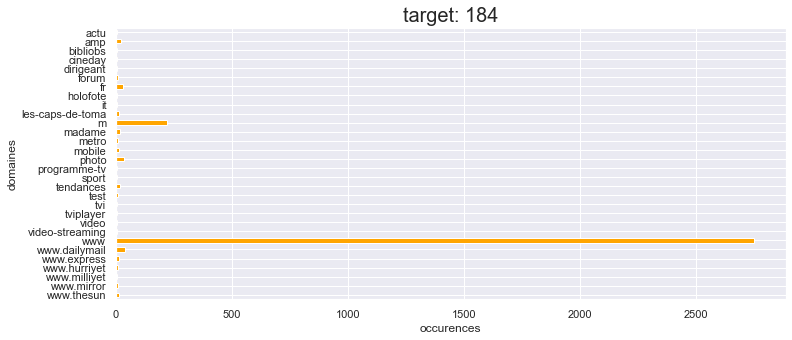

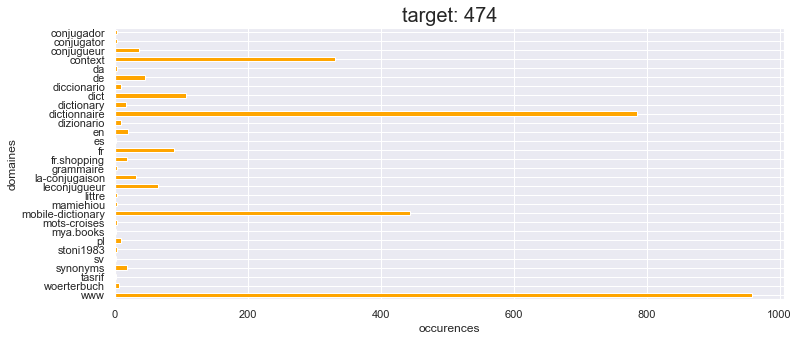

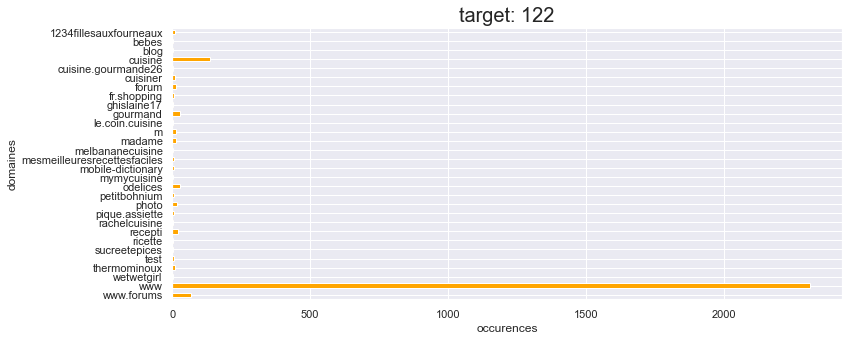

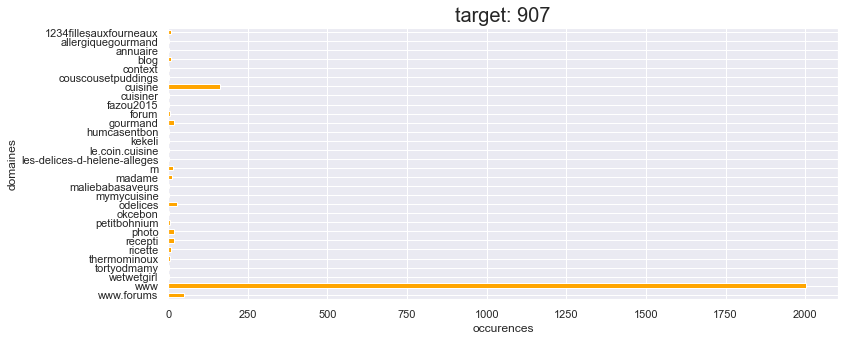

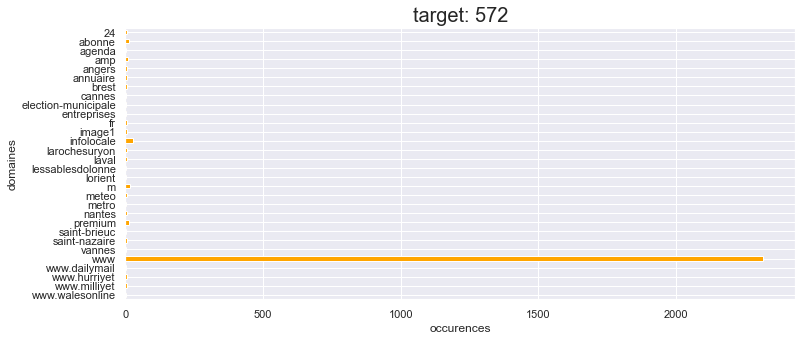

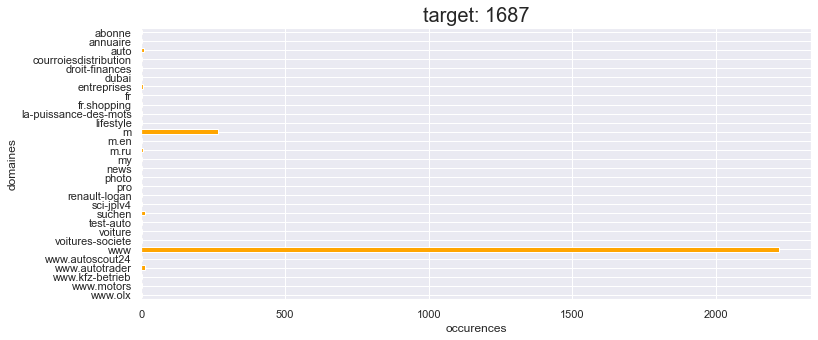

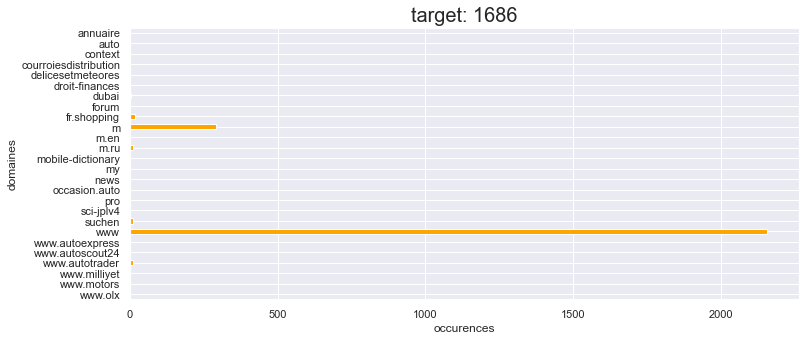

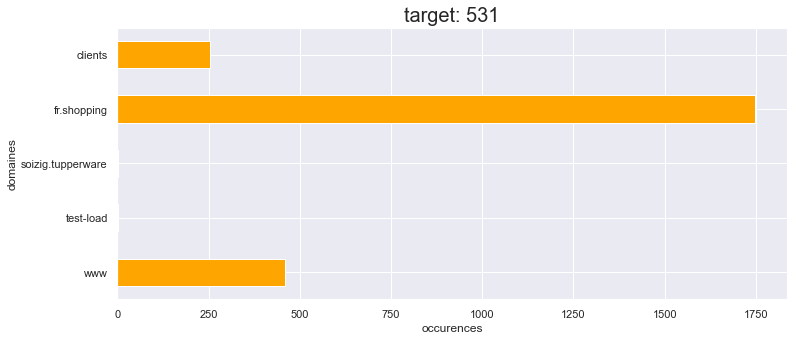

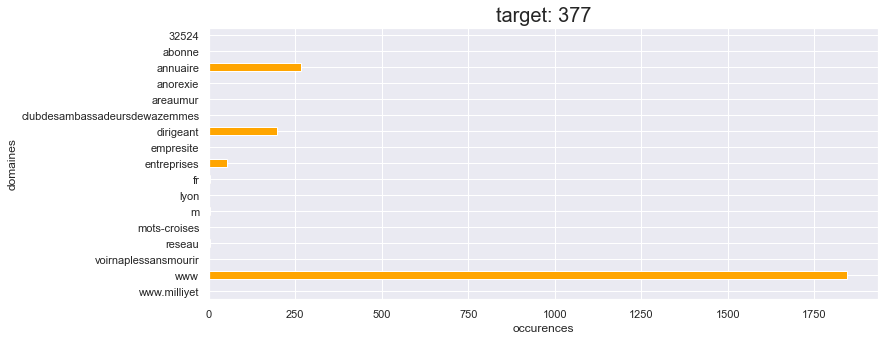

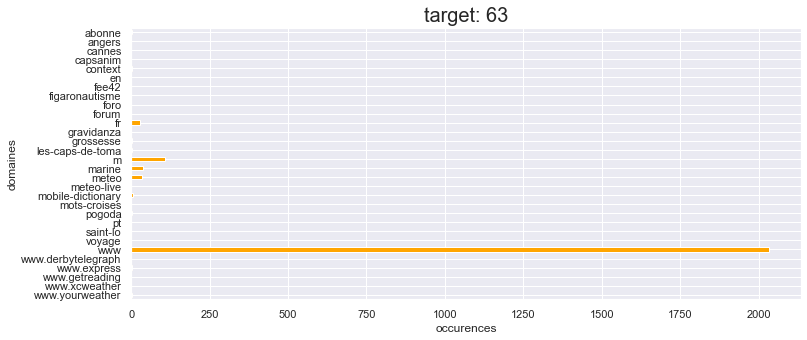

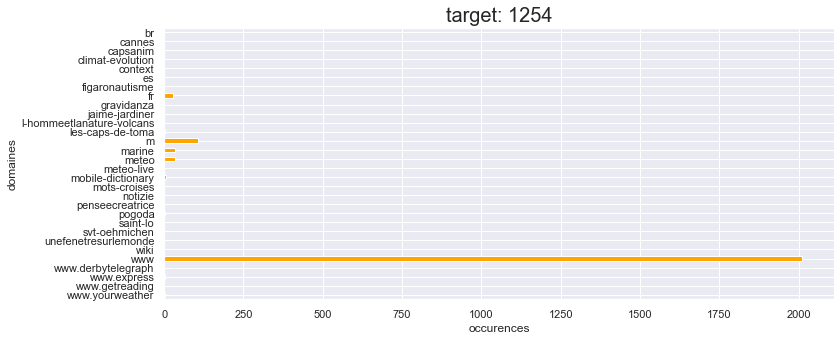

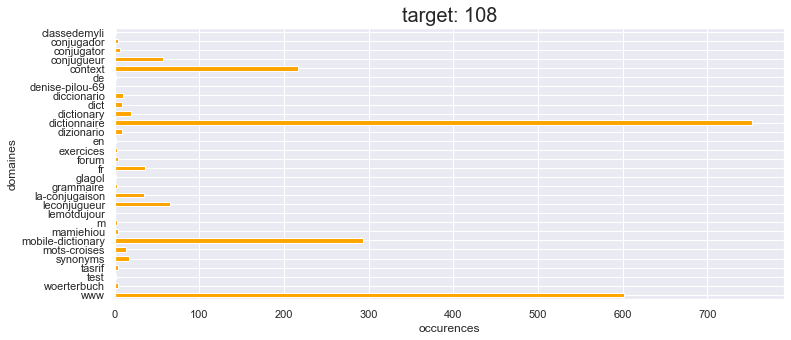

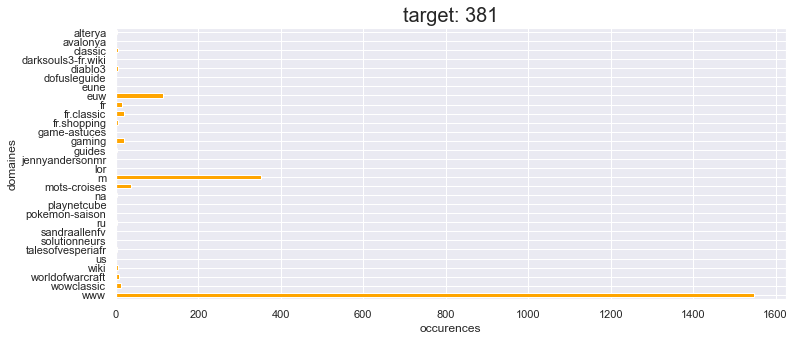

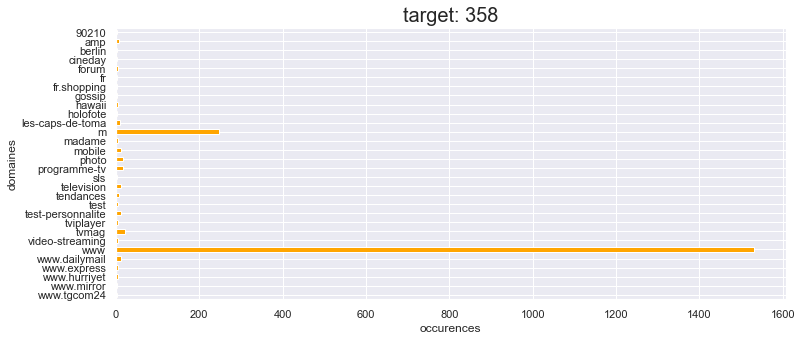

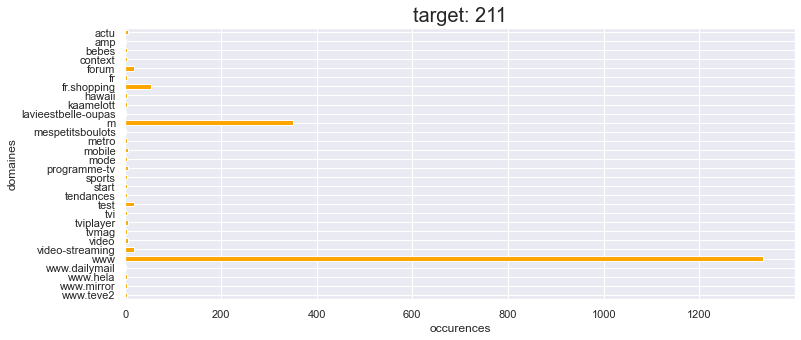

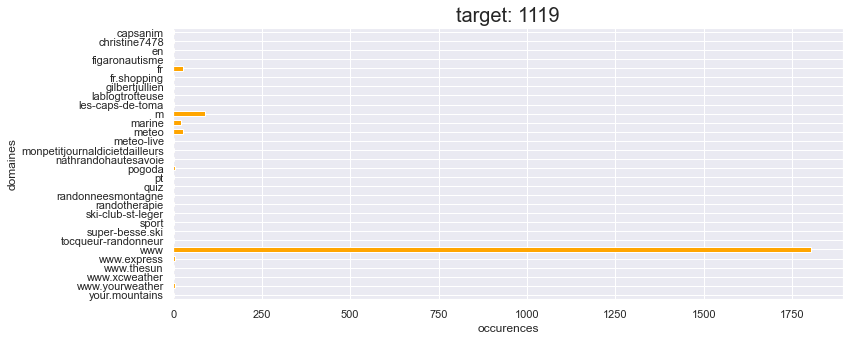

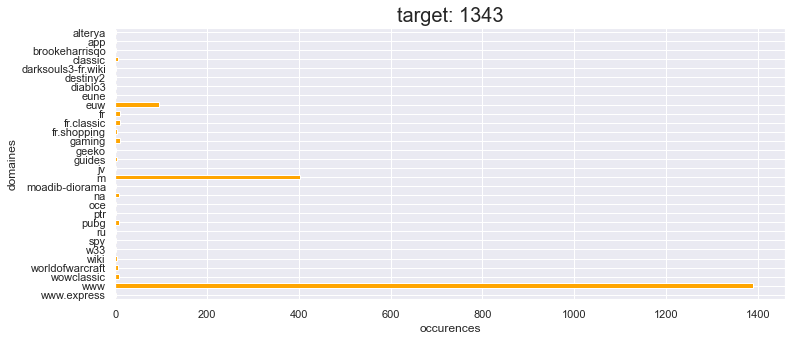

In [420]:
df_top_targets = df_stats.sort_values(ascending=False)[:20]
for target in df_top_targets.index:
    subset = df_cleaned_2[df_cleaned_2[str(target)]==1]
    df_tmp = subset.explode('sous_domaine')['sous_domaine'].value_counts()[:30].sort_index(ascending=False)
    sns.set(font_scale = 1)
    df_tmp.plot.barh(figsize=(12,5),color='orange')
    plt.xlabel('occurences')
    plt.ylabel('domaines')
    plt.title("target: "+str(target), fontsize=20)

    plt.show()


In [431]:
df_cleaned_2.head(5)

target  day sous_domaine    domaine top_domaine  \
0  [1831, 1751, 1192, 745, 1703]    4          www  cdiscount         com   
1     [847, 978, 582, 1381, 529]    4          www    mystalk         net   
2                [20, 1077, 294]    4          www    lequipe          fr   
3     [381, 935, 1343, 622, 933]    4            m  jeuxvideo         com   
4   [692, 1265, 725, 1264, 1266]    4      context    reverso         net   

                                                   tokens_path  100  1000  \
0  [bricolag, electricit, batter, plomb, ah, ova, toplux, ova]    0     0   
1                                       [profil, vitoriafcorr]    0     0   
2                                     [ten, ten, fich, joueur]    0     0   
3                    [forum, guild, fourm, legionnair, recrut]    0     0   
4                               [traduct, espagnol, franc, ir]    0     0   

   1001  1002  ...  990  991  992  993  994  995  996  997  998  999  
0     0     0  ...    0    0    0    0    0    0    0    0    0    0  
1     0     0  ...    0    0    0    0    0    0    0    0    0    0  
2     0     0  ...    0    0    0    0    0    0    0    0    0    0  
3     0     0  ...    0    0    0    0    0    0    0    0    0    0  
4     0     0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 1909 columns]

In [434]:
df_cleaned_3 = df_cleaned_2.copy(deep=True).drop(columns=['target'])
df_cleaned_3["tokens_path"] = df_cleaned_3.tokens_path.apply(path_tokenizer._join_words)

In [435]:
df_cleaned_3

day sous_domaine       domaine top_domaine  \
0        4          www     cdiscount         com   
1        4          www       mystalk         net   
2        4          www       lequipe          fr   
3        4            m     jeuxvideo         com   
4        4      context       reverso         net   
...    ...          ...           ...         ...   
67590    1          www  jeu-concours         biz   
67591    1          www           sto          cx   
67592   16          www           jeu        info   
67593    1    grossesse     aufeminin         com   
67594   16          www     conforama          fr   

                                                                           tokens_path  \
0                                   bricolag electricit batter plomb ah ova toplux ova   
1                                                                  profil vitoriafcorr   
2                                                                  ten ten fich joueur   
3                                                  forum guild fourm legionnair recrut   
4                                                            traduct espagnol franc ir   
...                                                                                ...   
67590                                                           gagn cafetier expresso   
67591                                                                             book   
67592                                                            solut imag mot niveau   
67593                                                     forum levr gonfle accouch fd   
67594  chambr liter liter sommi cadr latt sommi coffr cm bultex asteroid color bouleau   

       100  1000  1001  1002  1003  ...  990  991  992  993  994  995  996  \
0        0     0     0     0     0  ...    0    0    0    0    0    0    0   
1        0     0     0     0     0  ...    0    0    0    0    0    0    0   
2        0     0     0     0     0  ...    0    0    0    0    0    0    0   
3        0     0     0     0     0  ...    0    0    0    0    0    0    0   
4        0     0     0     0     0  ...    0    0    0    0    0    0    0   
...    ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
67590    0     0     0     0     0  ...    0    0    0    0    0    0    0   
67591    0     0     0     0     0  ...    0    0    0    0    0    0    0   
67592    0     0     0     0     0  ...    0    0    0    0    0    0    0   
67593    0     0     0     0     0  ...    0    0    0    0    0    0    0   
67594    0     0     0     0     0  ...    0    0    0    0    0    0    0   

       997  998  999  
0        0    0    0  
1        0    0    0  
2        0    0    0  
3        0    0    0  
4        0    0    0  
...    ...  ...  ...  
67590    0    0    0  
67591    0    0    0  
67592    0    0    0  
67593    0    0    0  
67594    0    0    0  

[67595 rows x 1908 columns]

#### Splitting the data:
Pour cette partie nous allons diviser les données aléatoirement en vérifiant le nombre de target

In [436]:
from sklearn.model_selection import train_test_split

y = df_cleaned_3.iloc[:, 5:]
x = df_cleaned_3.iloc[:, : 5]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
X_train

(50696, 5)
(16899, 5)


day          sous_domaine       domaine top_domaine  \
55294    9                   www     cdiscount         com   
29855    2                   www          1mot         net   
36303    4                   www           ndz          de   
53632   17                   www     cdiscount         com   
60839    2                   www      marmiton         org   
...    ...                   ...           ...         ...   
60027   11  mely.futuremaitresse     over-blog         com   
27476    9                   www     20minutos          es   
11311    4                   www       societe         com   
33258   13                     m  tuttoudinese          it   
17921    6                   www       lemonde          fr   

                                                                  tokens_path  
55294                maison meubl mobili obi cuisin complet element blanc mat  
29855                                                                    cret  
36303  welt schlaglicht artikel pann bei erster vorwahl der usdemokraten arid  
53632                                                  chaussur asic gel puls  
60839                                                recet album recet citron  
...                                                                       ...  
60027                                                   ideal box jeu pyramid  
27476                         notici brex uso datos movil roaming reino unido  
11311                                      etabl eiffag energ system val loir  
33258                                         notiz dopo rientr in gruppo sam  
17921                         ile franc sein marn bois roi elect presidentiel  

[50696 rows x 5 columns]

In [437]:
y_train

100  1000  1001  1002  1003  1004  1005  1006  1007  1008  ...  990  \
55294    0     0     0     0     0     0     0     0     0     0  ...    0   
29855    0     0     0     0     0     0     0     0     0     0  ...    0   
36303    0     0     0     0     0     0     0     0     0     0  ...    0   
53632    0     0     0     0     0     0     0     0     0     0  ...    0   
60839    0     0     0     0     0     0     0     0     0     0  ...    0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
60027    0     0     0     0     0     0     0     0     0     0  ...    0   
27476    0     0     0     0     0     0     0     0     0     0  ...    0   
11311    0     0     0     0     0     0     0     0     0     0  ...    0   
33258    0     0     0     0     0     0     0     0     0     0  ...    0   
17921    0     0     0     0     0     0     0     0     0     0  ...    0   

       991  992  993  994  995  996  997  998  999  
55294    0    0    0    0    0    0    0    0    0  
29855    0    0    0    0    0    0    0    0    0  
36303    0    0    0    0    0    0    0    0    0  
53632    0    0    0    0    0    0    0    0    0  
60839    0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
60027    0    0    0    0    0    0    0    0    0  
27476    0    0    0    0    0    0    0    0    0  
11311    0    0    0    0    0    0    0    0    0  
33258    0    0    0    0    0    0    0    0    0  
17921    0    0    0    0    0    0    0    0    0  

[50696 rows x 1903 columns]

5    44296
4     3704
1      939
3      931
2      826
dtype: int64


Text(0.5, 1.0, 'distrubtion du nombre de targets par url')

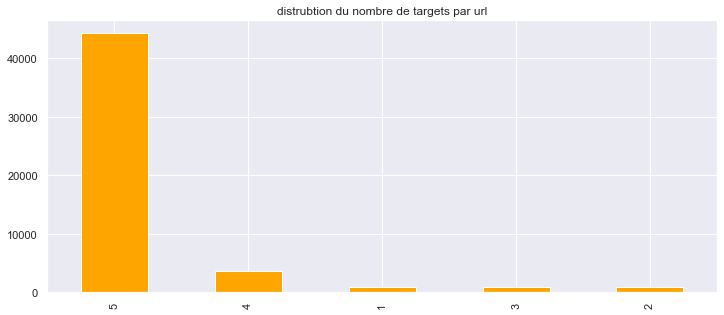

In [438]:
print(y_train.sum(axis=1).value_counts())
y_train.sum(axis=1).value_counts().plot(figsize=(12,5),kind='bar',color='orange')
plt.title("distrubtion du nombre de targets par url")

5    14764
4     1247
3      321
1      304
2      263
dtype: int64


Text(0.5, 1.0, 'distrubtion du nombre de targets par url')

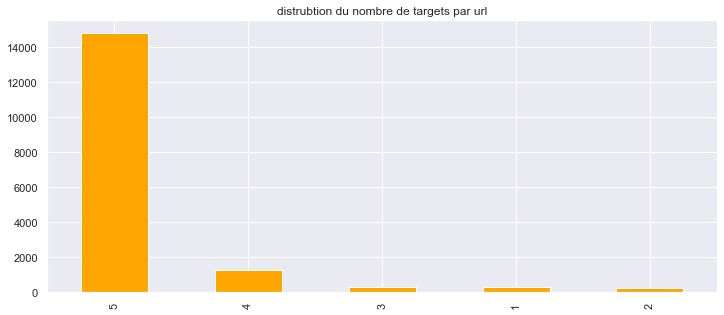

In [439]:
print(y_test.sum(axis=1).value_counts())
y_test.sum(axis=1).value_counts().plot(figsize=(12,5),kind='bar',color='orange')
plt.title("distrubtion du nombre de targets par url")

In [440]:
## nombre de categories pour le train et le test set
## 

In [324]:
X_train.head(5)

day    sous_domaine               domaine top_domaine  \
38850   15             www          ouest-france          fr   
52814   16             www               meteo60          fr   
44192   14             www  horairesdouverture24          fr   
41602    7  sante-medecine      journaldesfemmes          fr   
8034    18             www               tameteo         com   

                                  tokens_path  
38850   bretagn morbihan coup coeur chip bret  
52814     previs meteo franc montigny cormeil  
44192            filial vinassan durand alain  
41602  forum affich symptom semain avant regl  
8034   meteo montbellet europ franc saon loir

#### Dans la partie 3, nous entrainerons nos modèles sur nos données puis nous essayerons d'améliorer les résultats avec du feature enginieering et en effectuant une gridsearch pour trouver les bons hyperparams